<a href="https://colab.research.google.com/github/jiseop121/PowerPrediction/blob/main/EDA%2BXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [36]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direct

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 살펴보기

### 용어정리
* 일사 : 지표에 도달하는 태양복사에너지로 따갑고, 강한 느낌을 주는 등 피부가 인지할 수 있는 요소
* 일조 : 태양광선이 구름이나 안개로 가려지지 않고 실제로 땅위를 비춰 시각적으로 느낄 수 있는 현상

In [4]:
import pandas as pd
import numpy as np

root1 ="/content/drive/MyDrive/Colab Notebooks/github_repo/PowerPrediction/open/" # in my drive
root2 ="energy/" # in github repox

In [5]:
train=pd.read_csv(root1+'train.csv', encoding='utf-8')
test=pd.read_csv(root1+'test.csv', encoding='utf-8')
building_info=pd.read_csv(root1+'building_info.csv', encoding='utf-8')
submission=pd.read_csv(root1+'sample_submission.csv', encoding='utf-8')

In [6]:
train.shape, test.shape

((204000, 10), (16800, 7))

In [7]:
train.head()

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20220601 00     1  20220601 00   18.6      NaN      0.9   42.0     NaN   
1  1_20220601 01     1  20220601 01   18.0      NaN      1.1   45.0     NaN   
2  1_20220601 02     1  20220601 02   17.7      NaN      1.5   45.0     NaN   
3  1_20220601 03     1  20220601 03   16.7      NaN      1.4   48.0     NaN   
4  1_20220601 04     1  20220601 04   18.4      NaN      2.8   43.0     NaN   

   일사(MJ/m2)  전력소비량(kWh)  
0        NaN     1085.28  
1        NaN     1047.36  
2        NaN      974.88  
3        NaN      953.76  
4        NaN      986.40

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


In [10]:
building_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [11]:
train.isnull().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
dtype: int64

In [12]:
building_info['태양광용량(kW)'].unique()

array(['-', '40', '60', '447.2', '130.6', '56', '20', '64.8', '70', '110',
       '97.65', '50', '26.64', '30', '25', '83.72', '35', '100.56', '200',
       '46.2', '3', '9.45', '365', '14.4', '28.44', '65', '95', '60.45',
       '621', '100', '97.85', '98.28', '21.6'], dtype=object)

In [13]:
building_info['태양광용량(kW)'].unique()

array(['-', '40', '60', '447.2', '130.6', '56', '20', '64.8', '70', '110',
       '97.65', '50', '26.64', '30', '25', '83.72', '35', '100.56', '200',
       '46.2', '3', '9.45', '365', '14.4', '28.44', '65', '95', '60.45',
       '621', '100', '97.85', '98.28', '21.6'], dtype=object)

In [14]:
train.describe()

건물번호          기온(C)       강수량(mm)        풍속(m/s)  \
count  204000.000000  204000.000000  43931.000000  203981.000000   
mean       50.500000      25.543524      2.040830       2.134031   
std        28.866141       3.779523      5.165218       1.358109   
min         1.000000      10.100000      0.000000       0.000000   
25%        25.750000      23.400000      0.000000       1.200000   
50%        50.500000      25.700000      0.100000       2.000000   
75%        75.250000      28.100000      1.300000       2.800000   
max       100.000000      37.100000     92.200000      13.300000   

               습도(%)         일조(hr)      일사(MJ/m2)     전력소비량(kWh)  
count  203991.000000  128818.000000  116087.000000  204000.000000  
mean       78.716295       0.333637       1.063823    2451.036462  
std        15.080108       0.401486       1.001030    2440.648858  
min        13.000000       0.000000       0.000000       0.000000  
25%        69.000000       0.000000       0.200000    1085.760000  
50%        81.000000       0.100000       0.710000    1766.400000  
75%        91.000000       0.700000       1.780000    2970.000000  
max       100.000000       1.000000       3.920000   25488.400000

In [15]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary

In [16]:
resumetable(train)

데이터셋 형상: (204000, 10)


피처   데이터 타입  결측값 개수  고윳값 개수         첫 번째 값         두 번째 값  \
0  num_date_time   object       0  204000  1_20220601 00  1_20220601 01   
1           건물번호    int64       0     100              1              1   
2             일시   object       0    2040    20220601 00    20220601 01   
3          기온(C)  float64       0     263           18.6           18.0   
4        강수량(mm)  float64  160069     301            NaN            NaN   
5        풍속(m/s)  float64      19     120            0.9            1.1   
6          습도(%)  float64       9     101           42.0           45.0   
7         일조(hr)  float64   75182      11            NaN            NaN   
8      일사(MJ/m2)  float64   87913     379            NaN            NaN   
9     전력소비량(kWh)  float64       0   51812        1085.28        1047.36   

          세 번째 값  
0  1_20220601 02  
1              1  
2    20220601 02  
3           17.7  
4            NaN  
5            1.5  
6           45.0  
7            NaN  
8            NaN  
9         974.88

강수량 습도 풍속 습도 일조 일사 -> 0
- 대부분 밤 시간대이므로, 24시간 전력사용량 데이터를 훼손하지 않기 위해

- 명목형 : 건물번호
- 순서형 : 일시, 일조
- 연속형 : 기온, 강수량, 풍속, 습도, 일조, 일사, 전력소비량

In [17]:
train = train.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train.drop('num_date_time', axis = 1, inplace=True)

test = test.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test.drop('num_date_time', axis = 1, inplace=True)

building_info = building_info.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})

In [18]:
train.head()

building_number    date_time  temperature  rainfall  windspeed  humidity  \
0                1  20220601 00         18.6       NaN        0.9      42.0   
1                1  20220601 01         18.0       NaN        1.1      45.0   
2                1  20220601 02         17.7       NaN        1.5      45.0   
3                1  20220601 03         16.7       NaN        1.4      48.0   
4                1  20220601 04         18.4       NaN        2.8      43.0   

   sunshine  solar_radiation  power_consumption  
0       NaN              NaN            1085.28  
1       NaN              NaN            1047.36  
2       NaN              NaN             974.88  
3       NaN              NaN             953.76  
4       NaN              NaN             986.40

## 시각화 및 전처리

타겟값 분포

<Axes: xlabel='power_consumption', ylabel='Count'>

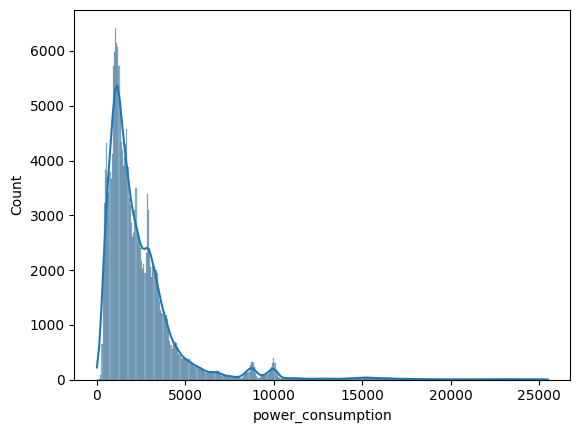

In [20]:
import seaborn as sns
sns.histplot(train['power_consumption'], kde=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='power_consumption', ylabel='Count'>

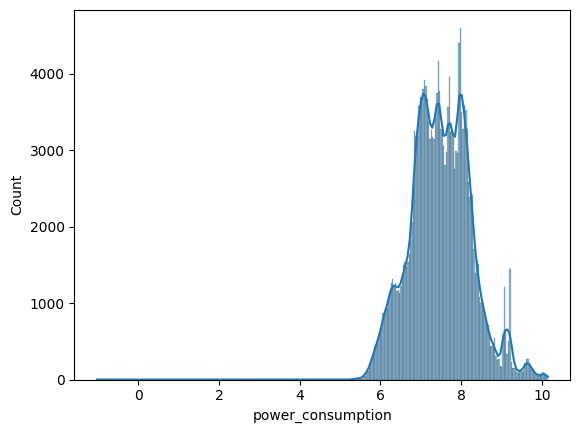

In [21]:
# log를 적용하여 정규화
sns.histplot(np.log(train['power_consumption']), kde= True)

building info랑 정보 합병

In [22]:
train = pd.merge(train, building_info, on='building_number', how='left')
test = pd.merge(test, building_info, on='building_number', how='left')


시간과 빌딩 타입의 상관관계

In [23]:
import plotly.express as px
fig = px.imshow(train.drop(['date_time','building_type'],axis=1).corr())
fig.show()

<ipython-input-23-9e84e136e77e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(train.drop(['date_time','building_type'],axis=1).corr())


In [24]:
train['solar_power_capacity'].unique()

array(['-', '40', '60', '447.2', '130.6', '56', '20', '64.8', '70', '110',
       '97.65', '50', '26.64', '30', '25', '83.72', '35', '100.56', '200',
       '46.2', '3', '9.45', '365', '14.4', '28.44', '65', '95', '60.45',
       '621', '100', '97.85', '98.28', '21.6'], dtype=object)

이상치 탐색

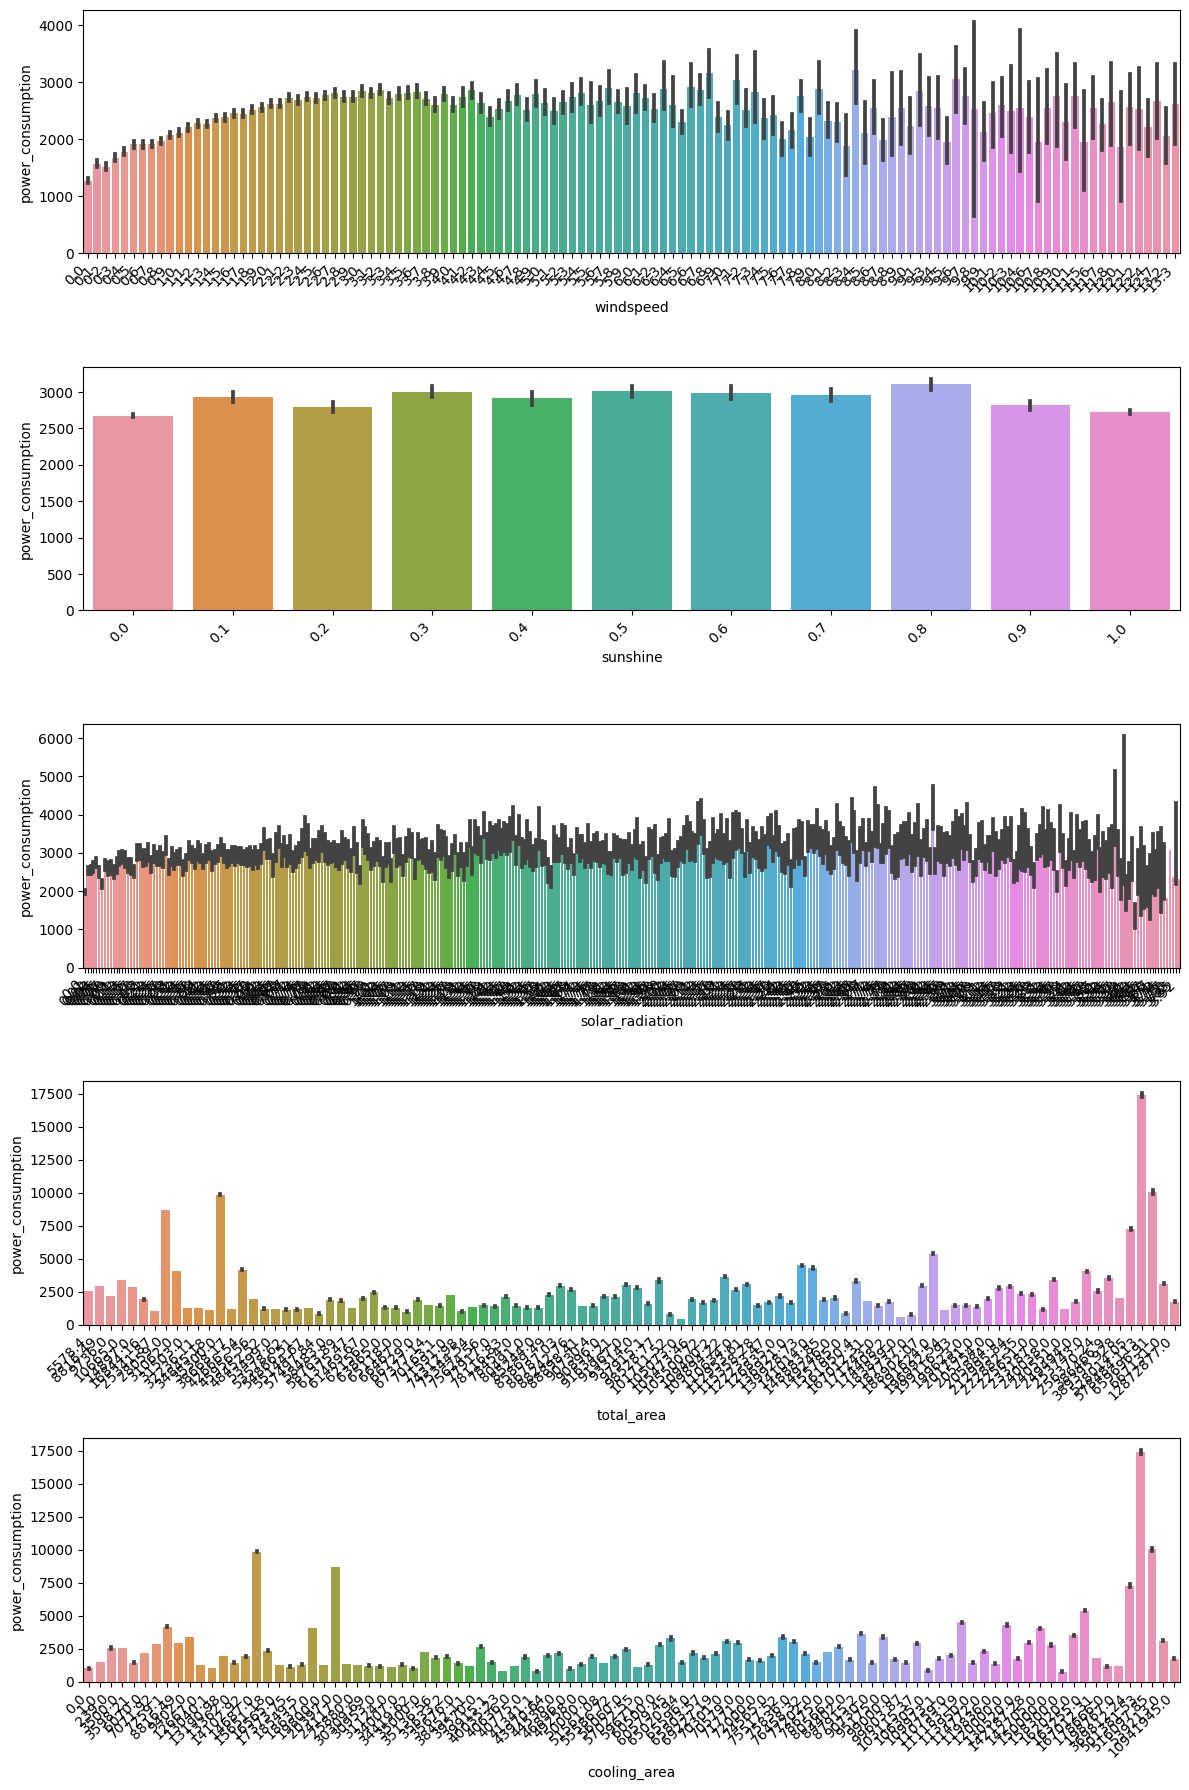

In [25]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.barplot(x='windspeed', y='power_consumption', data=train, ax=axes[0])
sns.barplot(x='sunshine', y='power_consumption', data=train, ax=axes[1])
sns.barplot(x='solar_radiation', y='power_consumption', data=train, ax=axes[2])
sns.barplot(x='total_area', y='power_consumption', data=train, ax=axes[3])
sns.barplot(x='cooling_area', y='power_consumption', data=train, ax=axes[4])

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

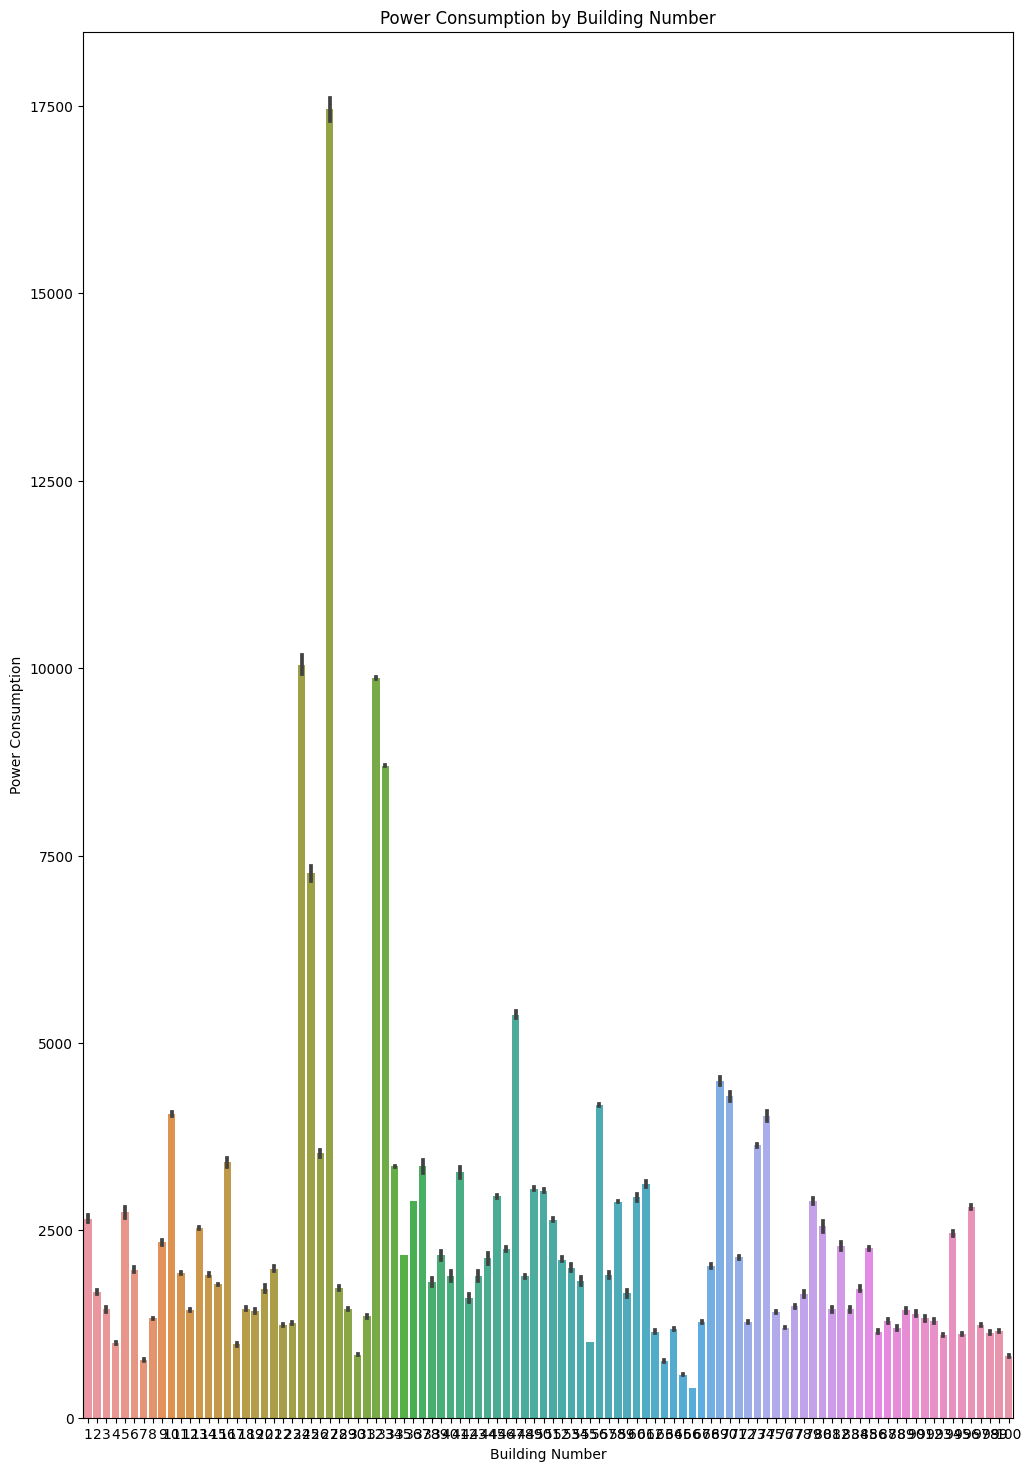

In [26]:
#building type에 따른 이상치탐색
fig, axes = plt.subplots(1, 1, figsize=(12, 18))

# Plot the barplot on the first axis
sns.barplot(x='building_number', y='power_consumption', data=train, ax=axes)

# Customize the plot, if needed
axes.set_title('Power Consumption by Building Number')
axes.set_xlabel('Building Number')
axes.set_ylabel('Power Consumption')

# Show the plot
plt.show()

날짜별 전력량 추이

In [27]:
train['datetime'] = pd.to_datetime(train['date_time'], format='%Y%m%d %H')

# date time feature 생성
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['weekday'] = train['datetime'].dt.dayofweek

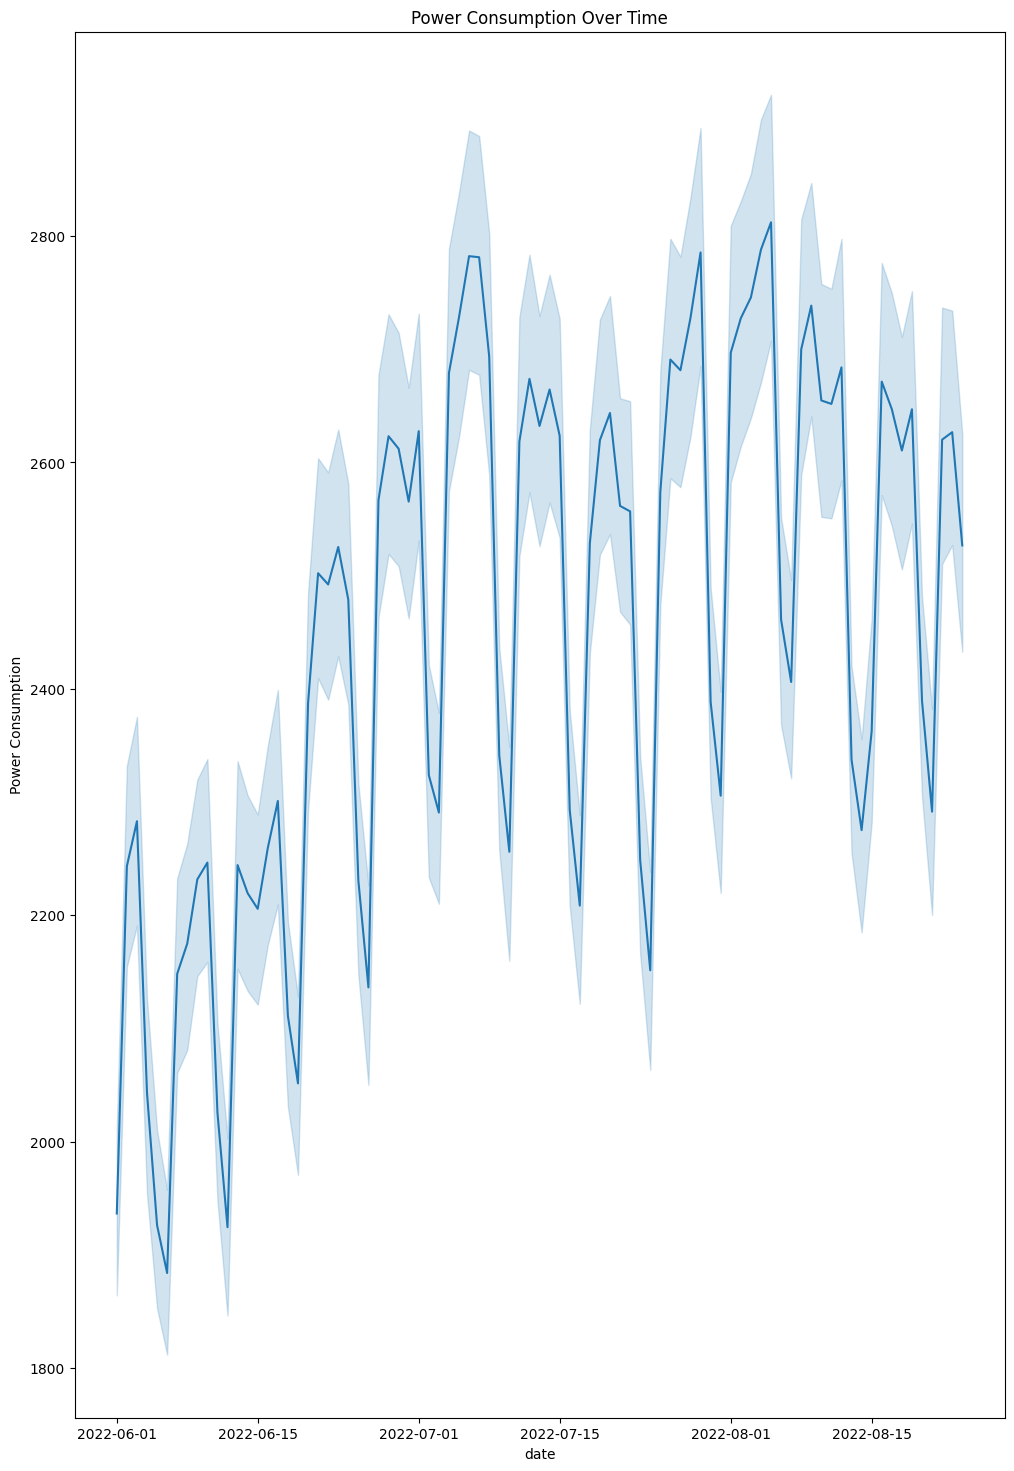

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'train'
# and it has columns 'date_time' and 'power_consumption'

# Create a 1x1 subplot grid
train['date'] = train['datetime'].dt.date
fig, axes = plt.subplots(1, 1, figsize=(12, 18))

# Plot the lineplot on the first axis
sns.lineplot(x='date', y='power_consumption', data=train, ax=axes)

# Customize the plot, if needed
axes.set_title('Power Consumption Over Time')
axes.set_xlabel('date')
axes.set_ylabel('Power Consumption')

# Show the plot
plt.show()


각 시간 단위에 따른 전력 소비량

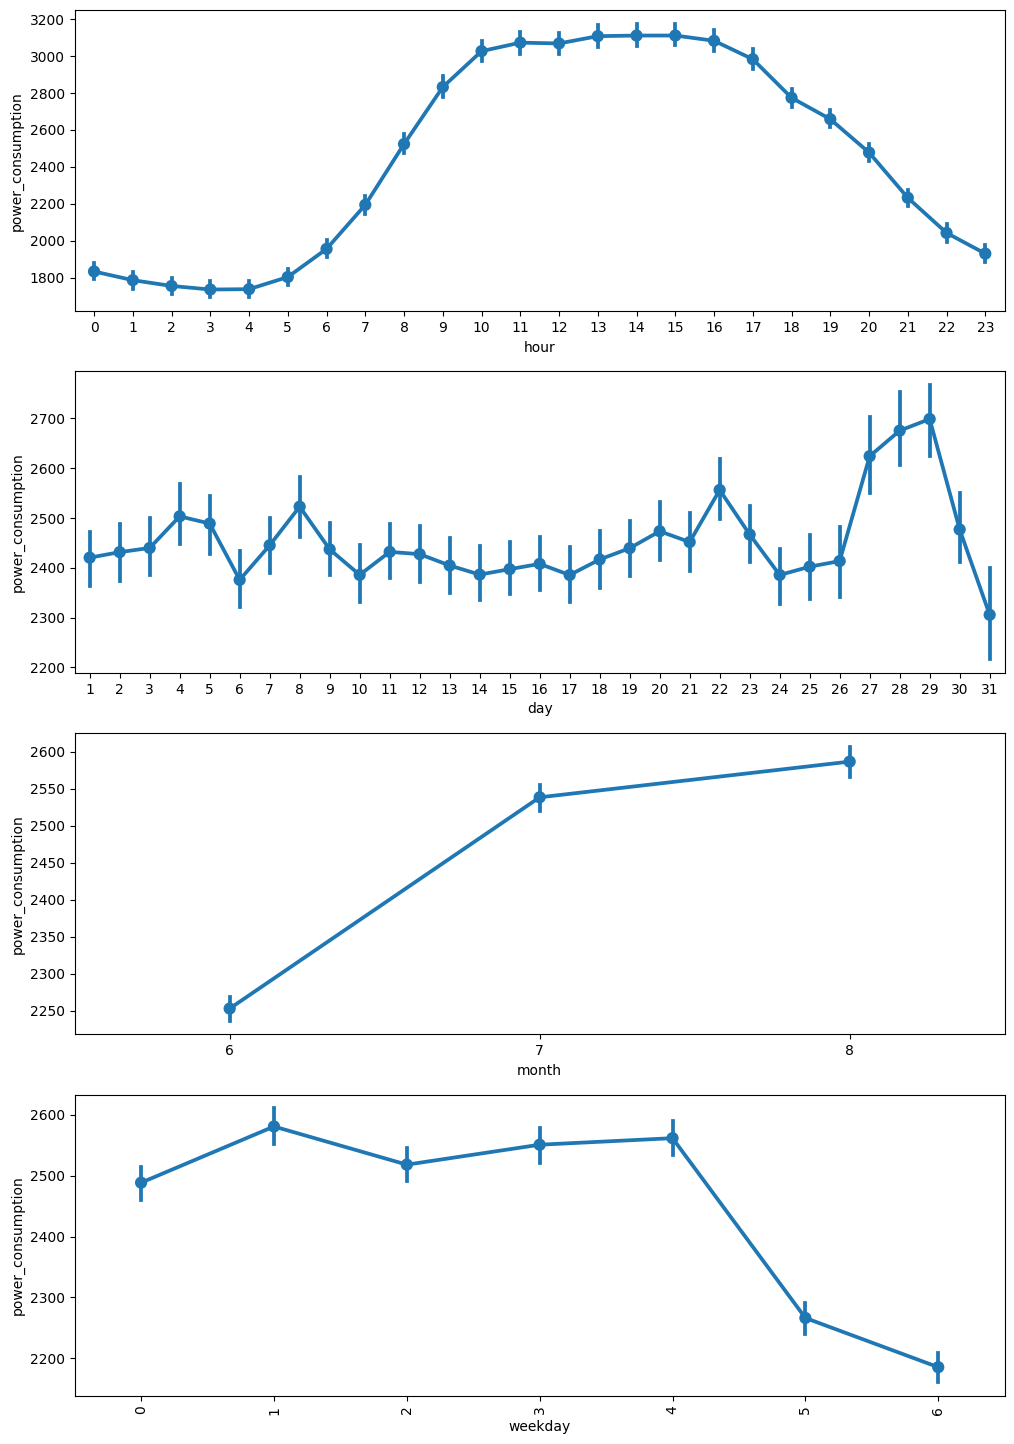

In [29]:
figure, axes = plt.subplots(nrows=4)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='power_consumption', data=train, ax=axes[0])
sns.pointplot(x='day', y='power_consumption', data=train, ax=axes[1])
sns.pointplot(x='month', y='power_consumption', data=train, ax=axes[2])
sns.pointplot(x='weekday', y='power_consumption', data=train, ax=axes[3])

plt.xticks(rotation=90)
plt.show()

모든 시간의 각 요일의 이상치 탐색

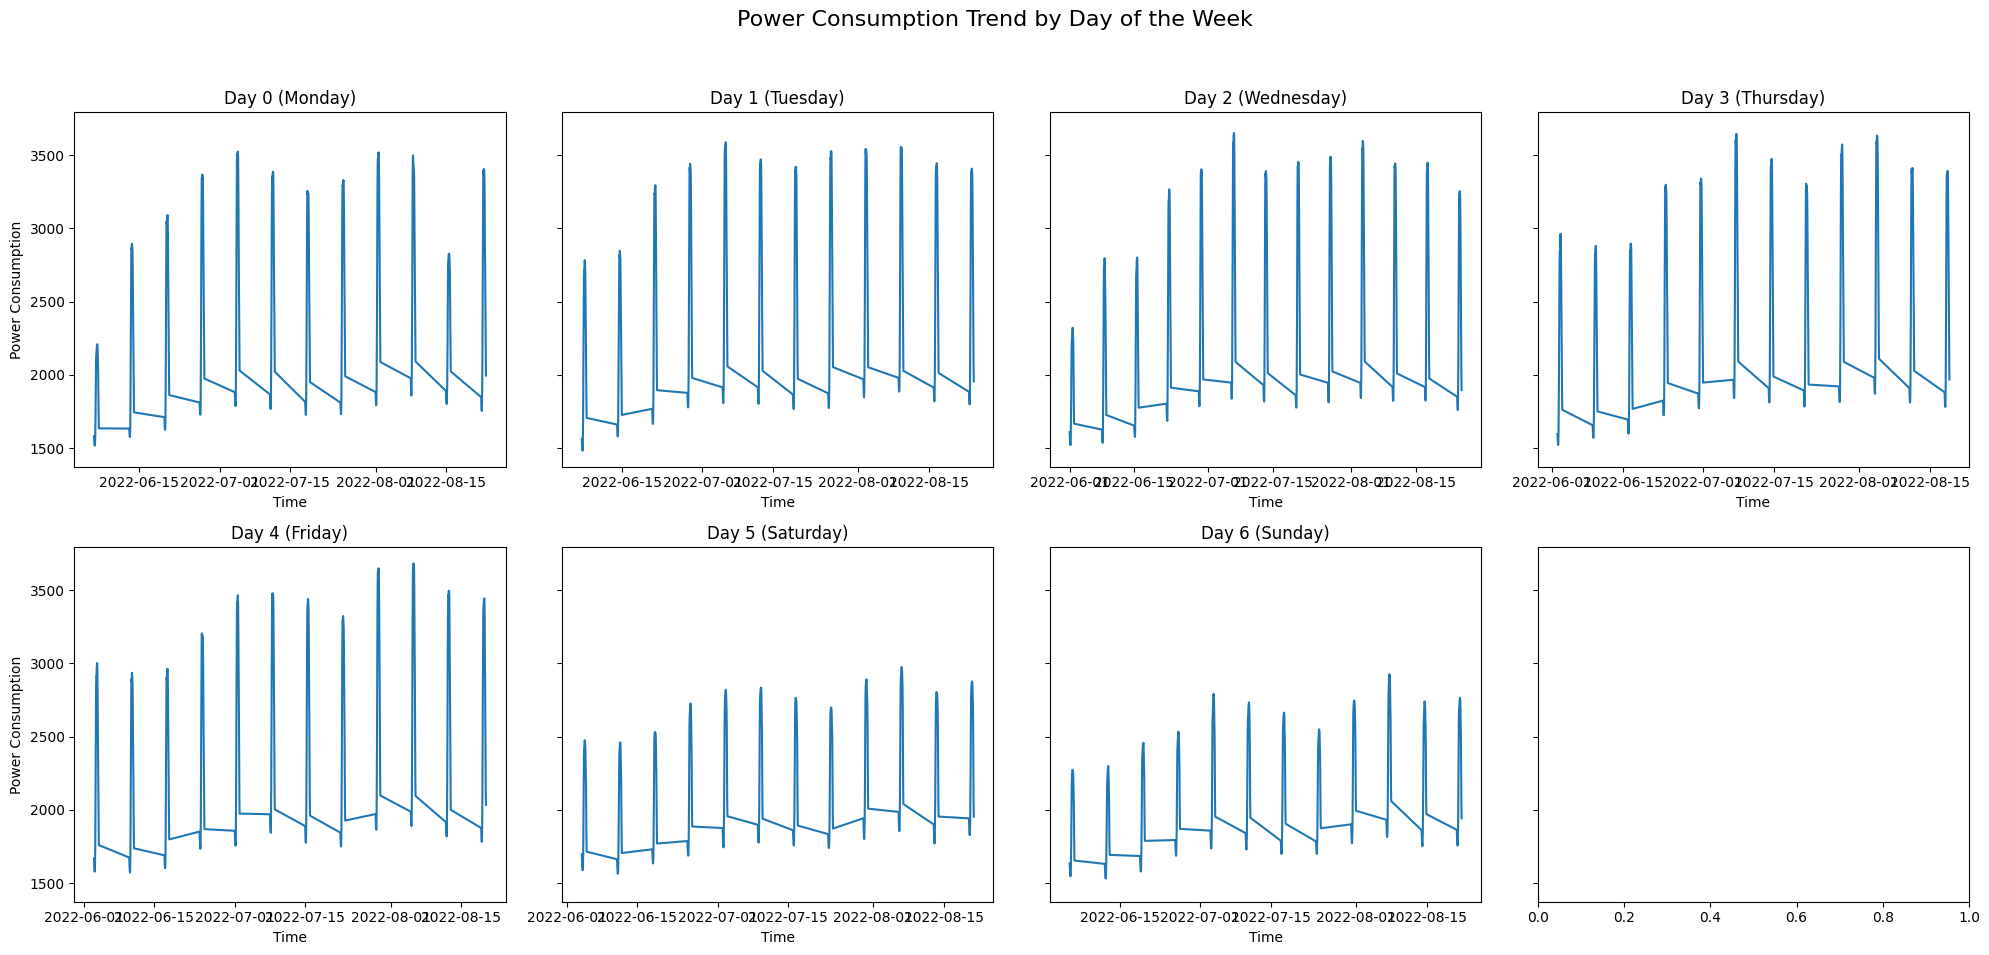

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'train'
# and it has columns 'date_time' and 'power_consumption'

# Convert 'date_time' to datetime object

# Extract the day of the week and create a new column
train['weekday'] = train['datetime'].dt.dayofweek

# Create a 2x4 subplot grid (for each day of the week)
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
fig.suptitle('Power Consumption Trend by Day of the Week', fontsize=16)

# Iterate over each day of the week (0 to 6)
for day, ax in zip(range(7), axes.flatten()):
    # Filter data for the specific day
    filtered_data = train[train['weekday'] == day]

    # Plot the lineplot on the current axis
    sns.lineplot(x='datetime', y='power_consumption', data=filtered_data, ax=ax, ci=None)  # Set ci=None to remove confidence interval

    # Customize the plot
    ax.set_title(f'Day {day} ({filtered_data.iloc[0]["datetime"].strftime("%A")})')
    ax.set_xlabel('Time')
    ax.set_ylabel('Power Consumption')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

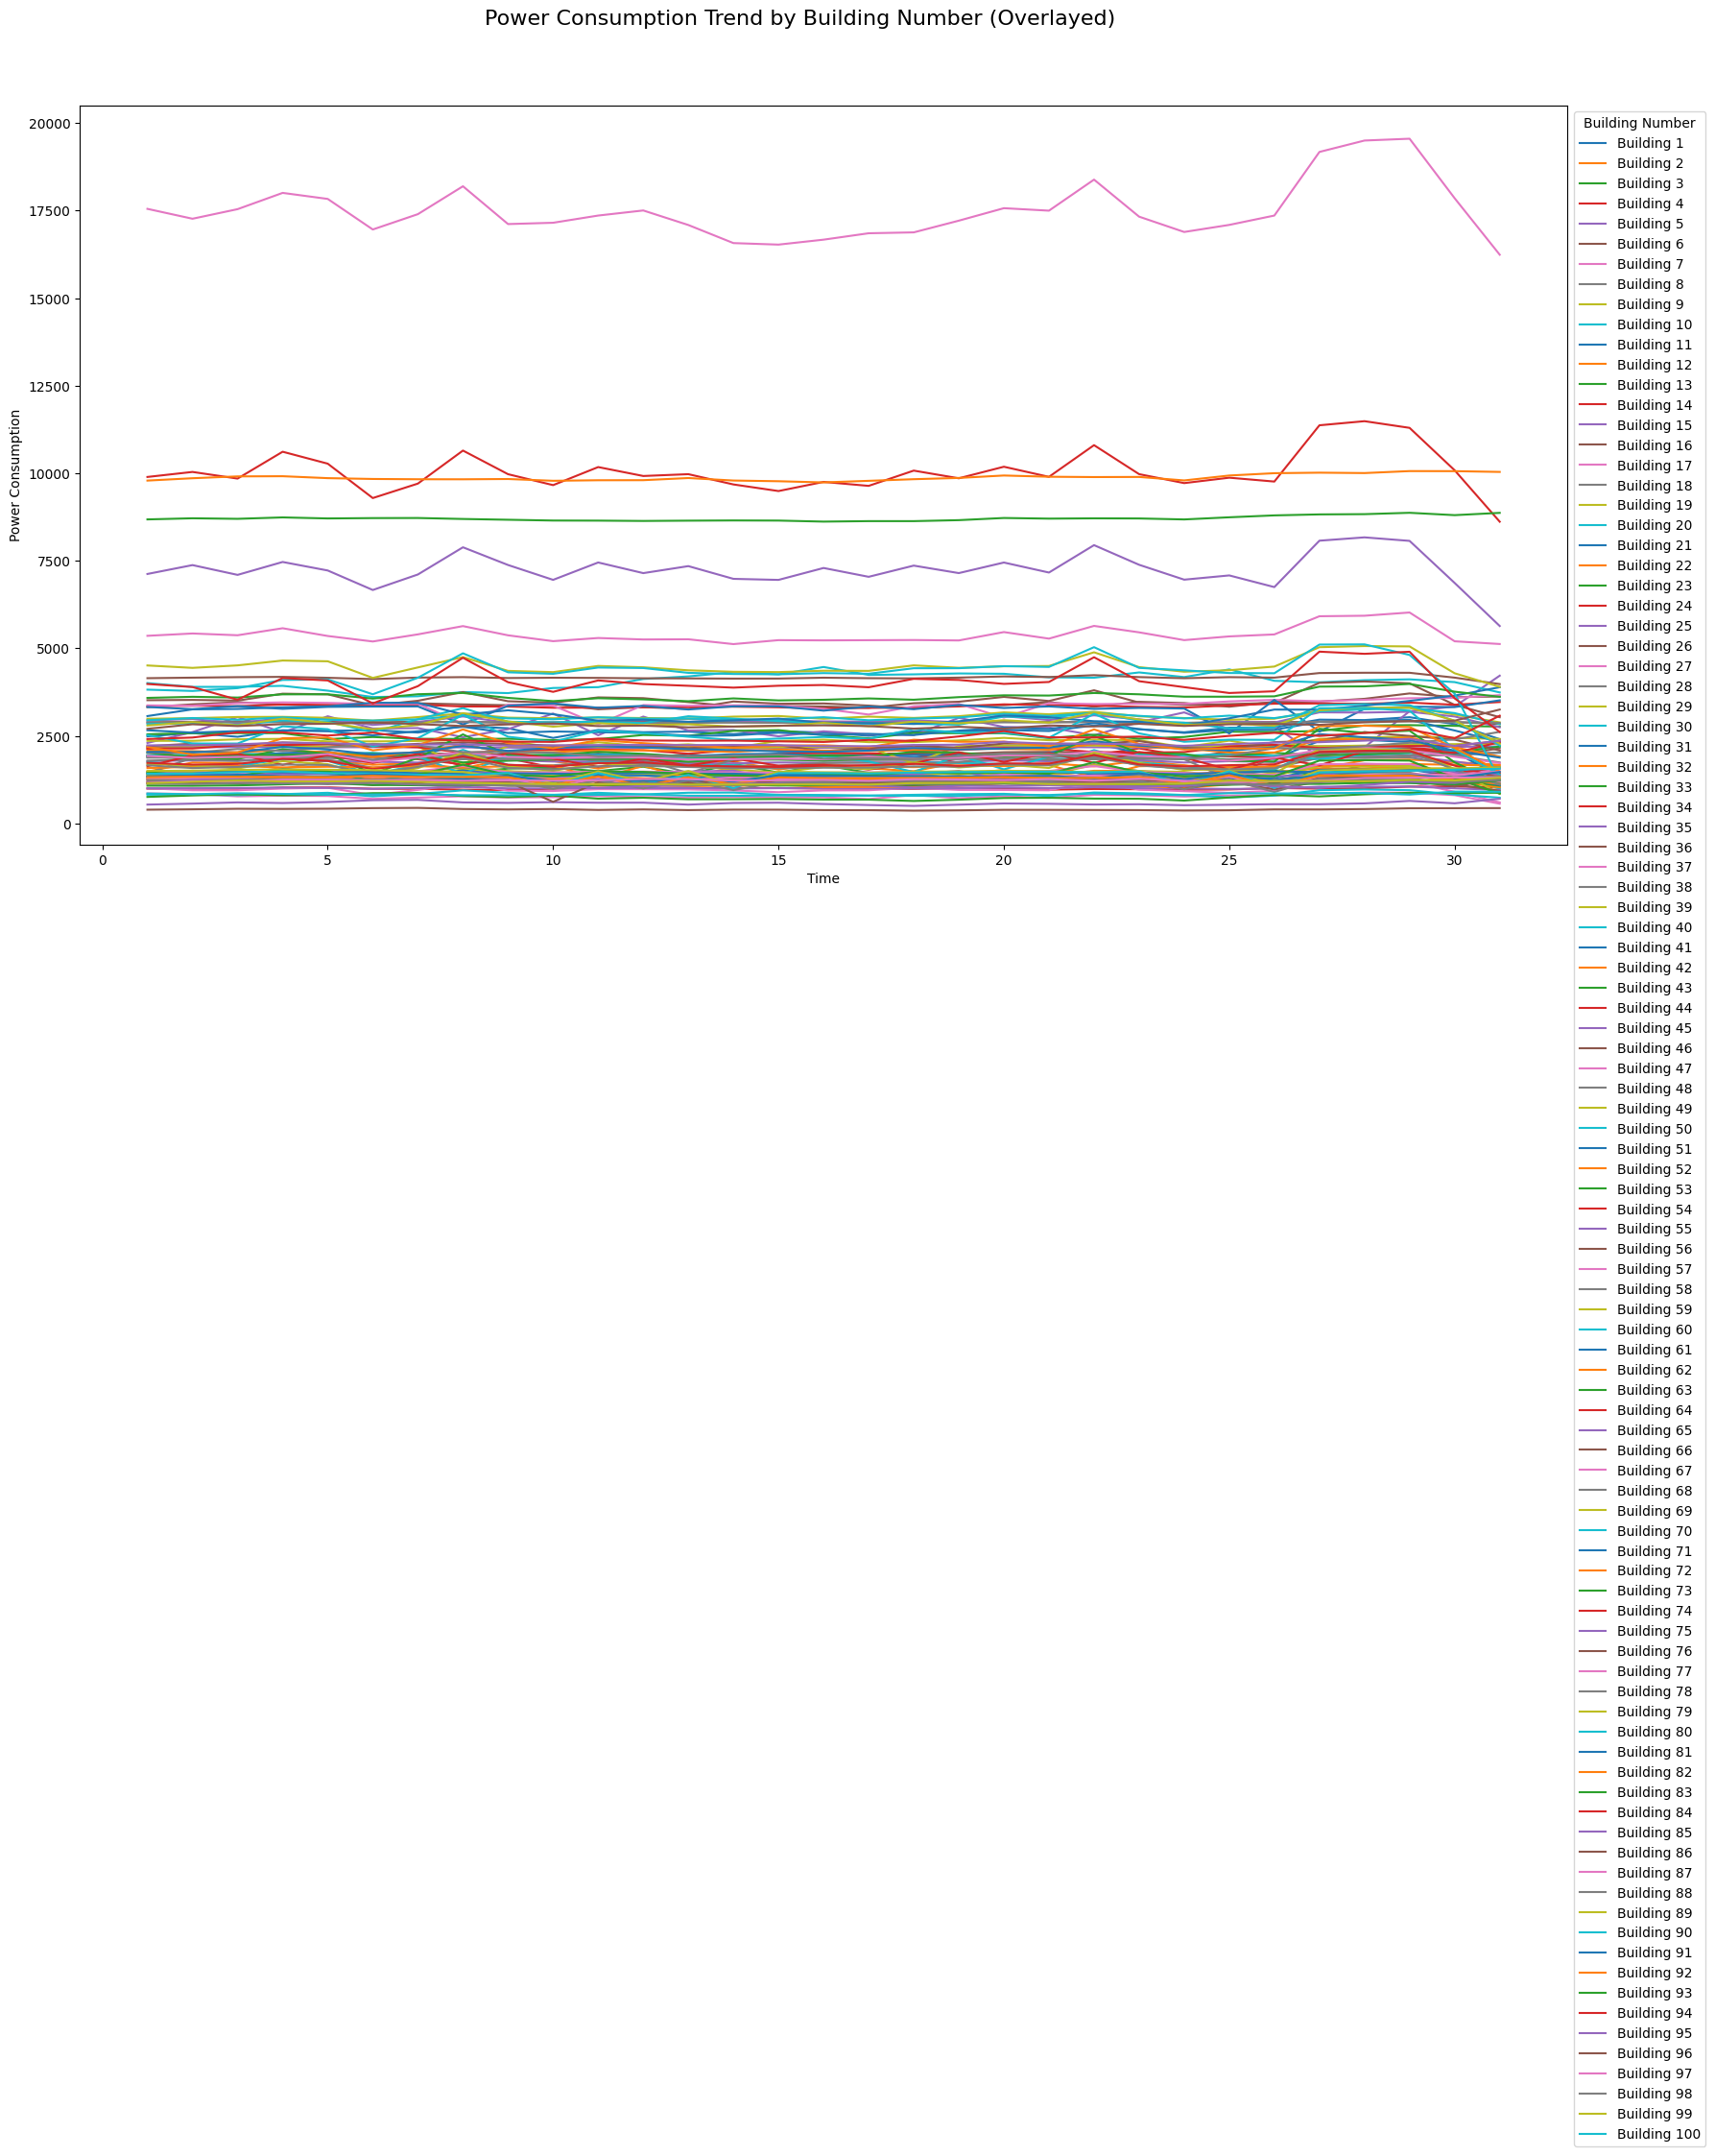

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'train'
# and it has columns 'datetime', 'power_consumption', and 'building_number'

# Assuming 'building_number' ranges from 1 to 100
num_buildings = 100
buildings_per_subplot = 10

# Create a single subplot
fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle('Power Consumption Trend by Building Number (Overlayed)', fontsize=16)

# Iterate over each group of 10 building numbers
for start_building in range(1, num_buildings, buildings_per_subplot):
    # Plot the lineplot for each building in the group on the same axis
    for building_number in range(start_building, start_building + buildings_per_subplot):
        # Filter data for the specific building
        filtered_data = train[train['building_number'] == building_number]

        # Plot the lineplot on the current axis
        sns.lineplot(x='day', y='power_consumption', data=filtered_data, label=f'Building {building_number}', ax=ax, ci=None)
        # Set ci=None to remove confidence interval

# Customize the plot
ax.set_xlabel('Time')
ax.set_ylabel('Power Consumption')
ax.legend(title='Building Number', bbox_to_anchor=(1, 1), loc='upper left')  # Move legend outside the plot area

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

# Show the plot
plt.show()

In [32]:
train['building_type'].unique()

array(['건물기타', '공공', '대학교', '데이터센터', '백화점및아울렛', '병원', '상용', '아파트', '연구소',
       '지식산업센터', '할인마트', '호텔및리조트'], dtype=object)

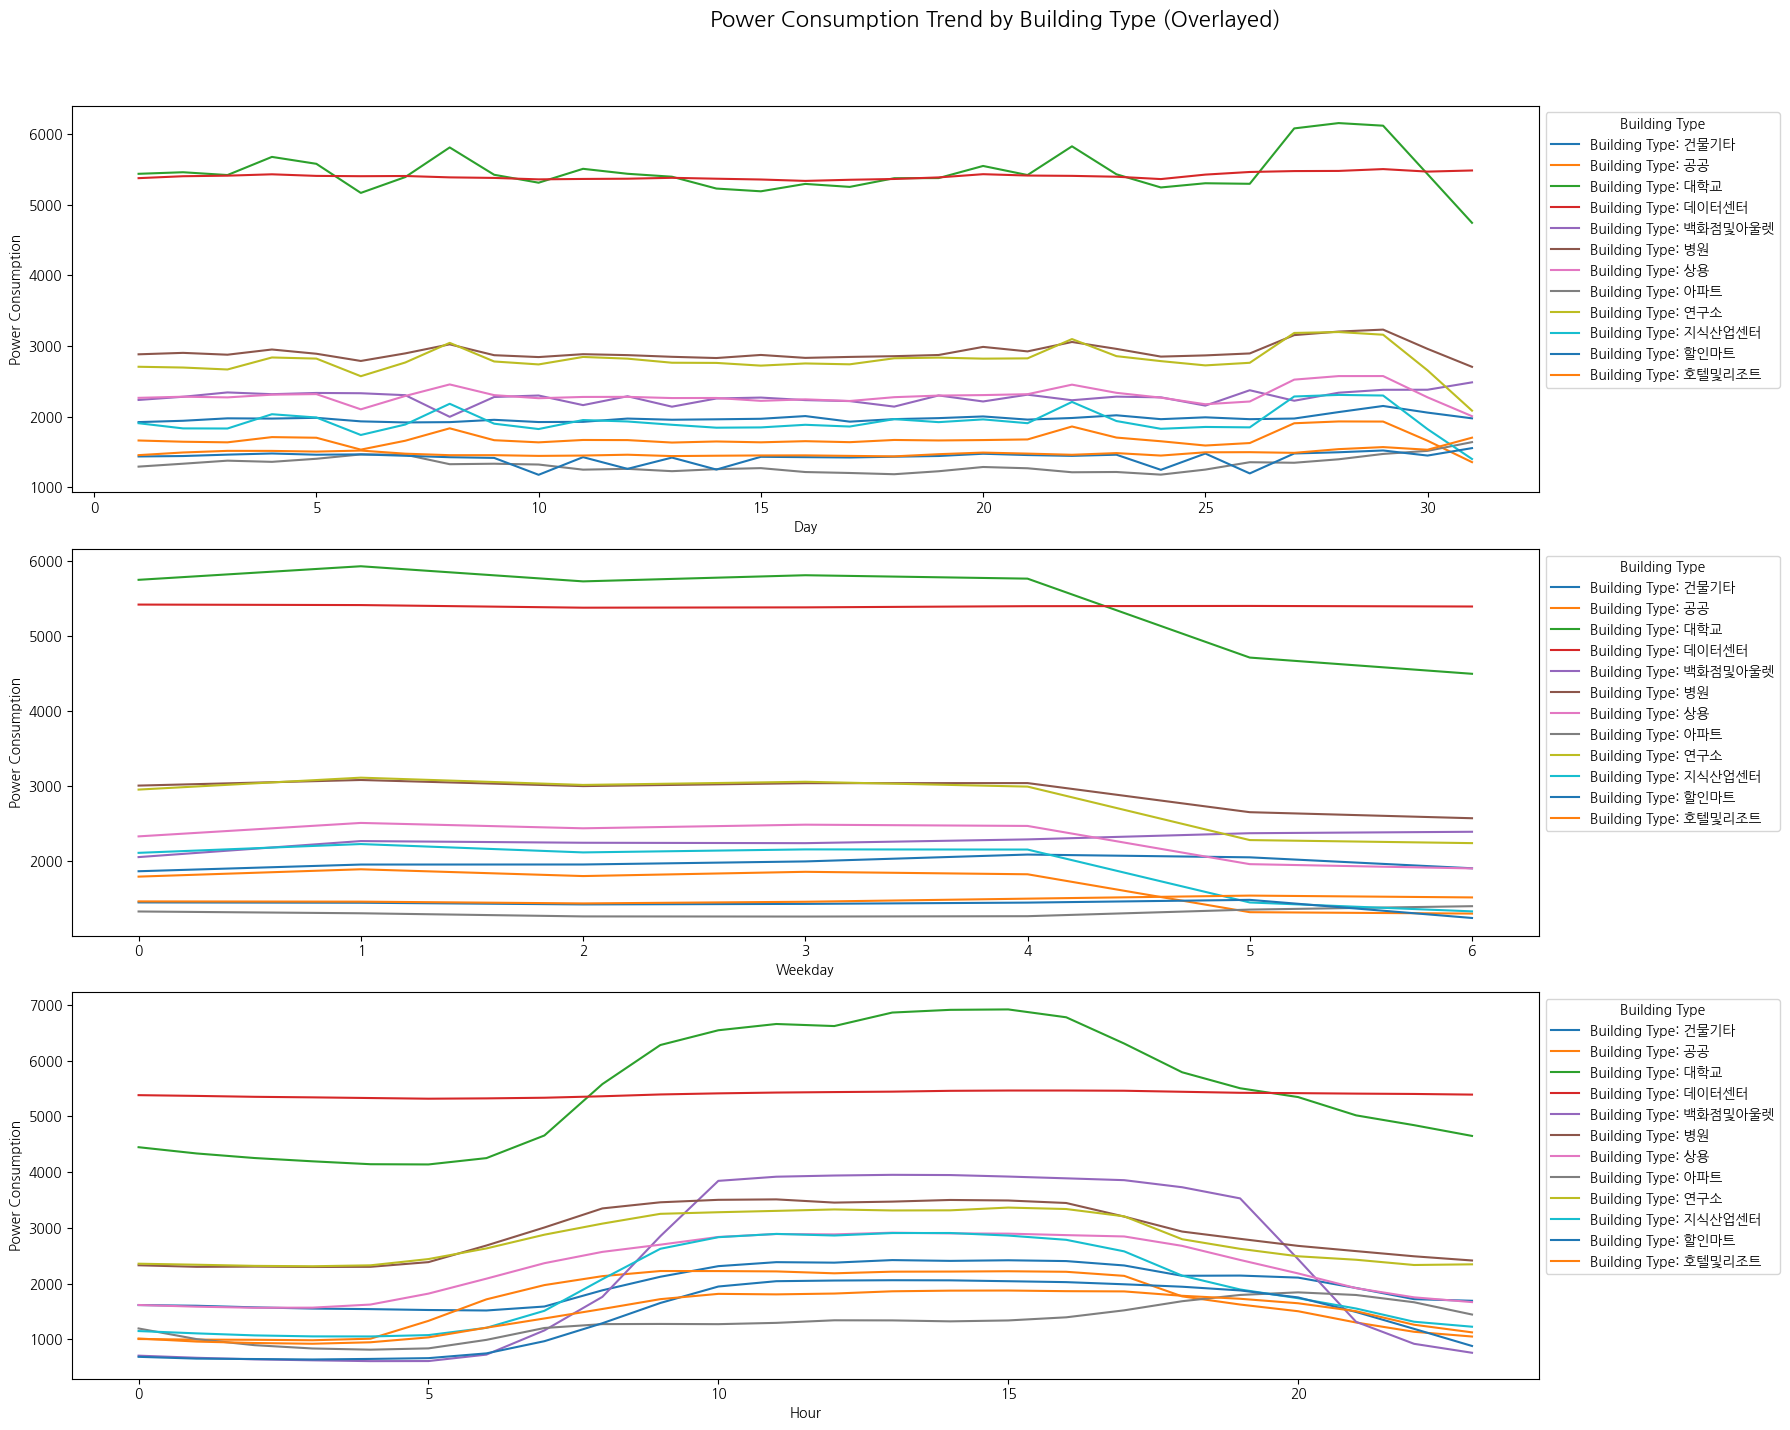

In [33]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# Assuming you have a DataFrame called 'train'
# and it has columns 'datetime', 'power_consumption', 'building_type'

# Convert 'datetime' to datetime object
train['datetime'] = pd.to_datetime(train['datetime'])

# Assuming 'building_type' is a string column
building_types = train['building_type'].unique()

# Create three subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
fig.suptitle('Power Consumption Trend by Building Type (Overlayed)', fontsize=16)

# Iterate over each building type
for building_type in building_types:
    # Filter data for the specific building type
    filtered_data = train[train['building_type'] == building_type]

    # Plot the lineplot on the corresponding subplot
    sns.lineplot(x='day', y='power_consumption', data=filtered_data, label=f'Building Type: {building_type}', ax=axes[0], ci=None)
    sns.lineplot(x='weekday', y='power_consumption', data=filtered_data, label=f'Building Type: {building_type}', ax=axes[1], ci=None)
    sns.lineplot(x='hour', y='power_consumption', data=filtered_data, label=f'Building Type: {building_type}', ax=axes[2], ci=None)

# Customize the plots
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Power Consumption')
axes[0].legend(title='Building Type', bbox_to_anchor=(1, 1), loc='upper left')

axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Power Consumption')
axes[1].legend(title='Building Type', bbox_to_anchor=(1, 1), loc='upper left')

axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Power Consumption')
axes[2].legend(title='Building Type', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

# Show the plot
plt.show()

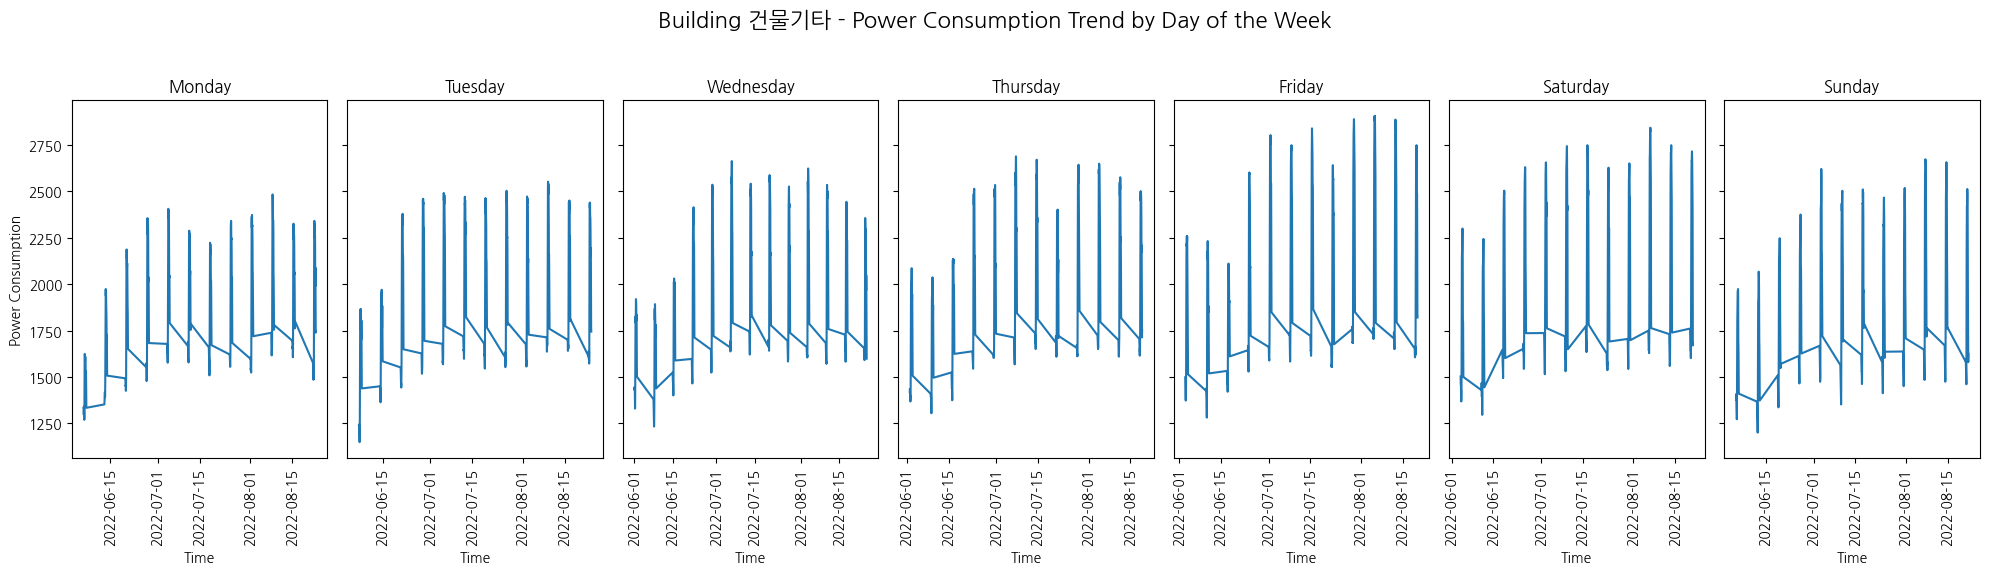

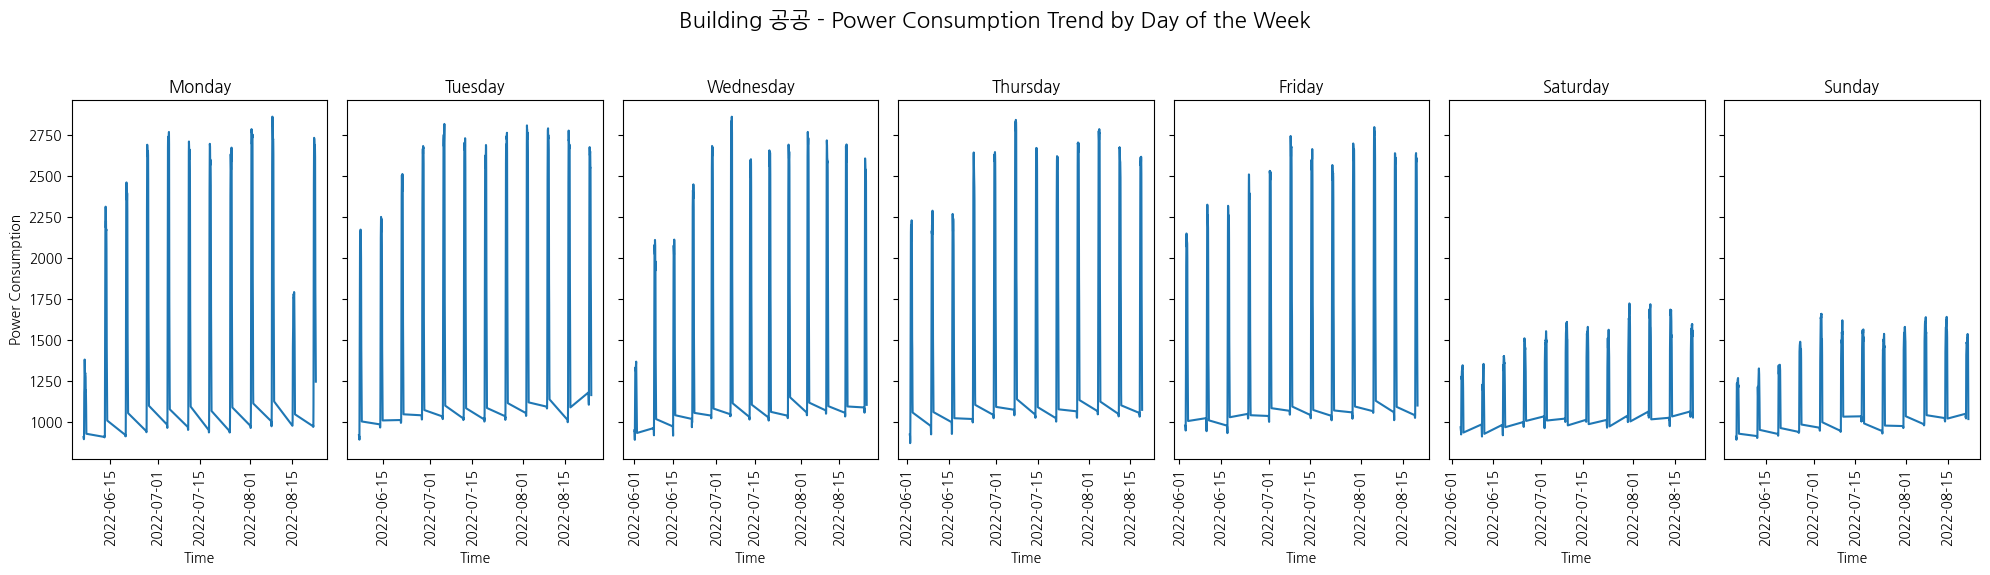

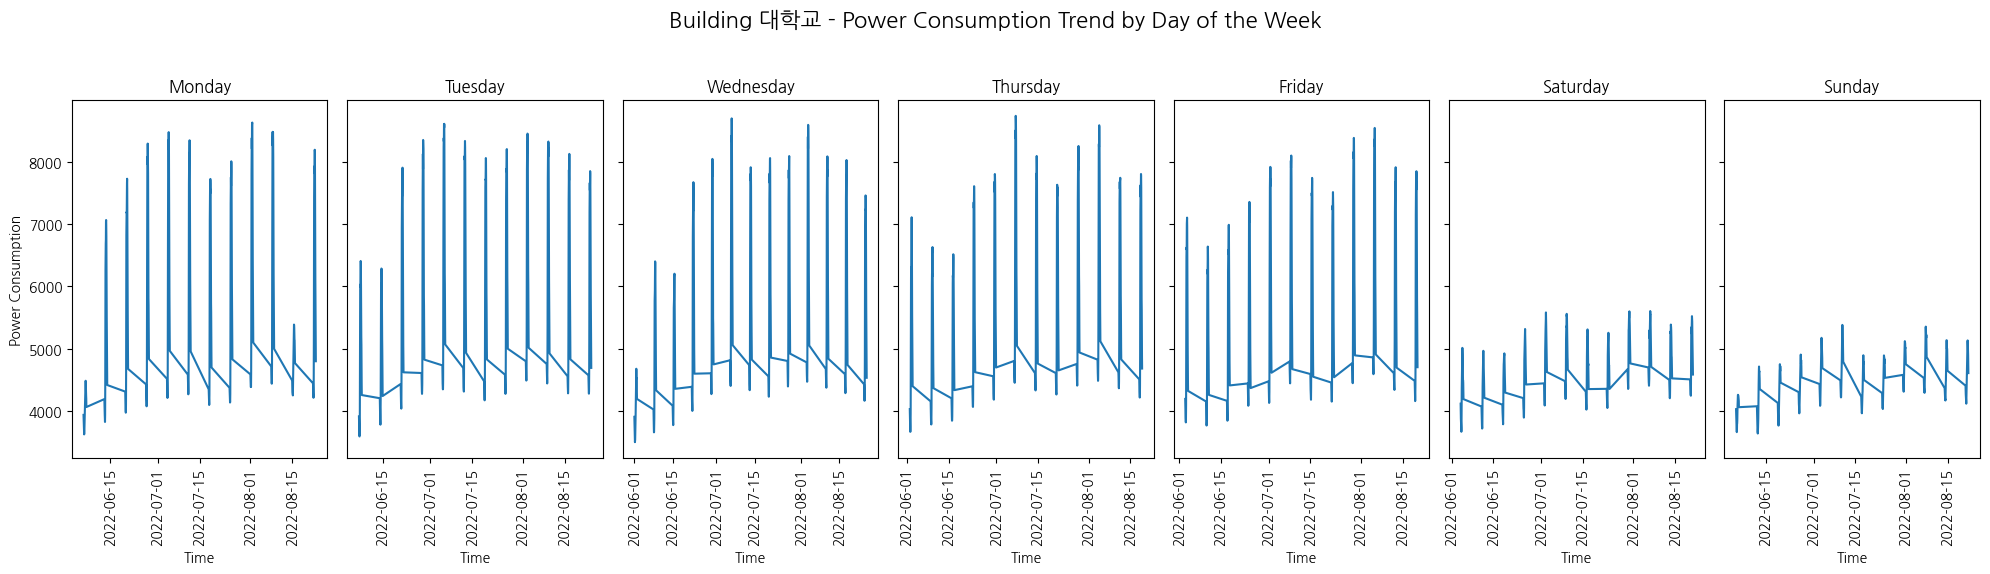

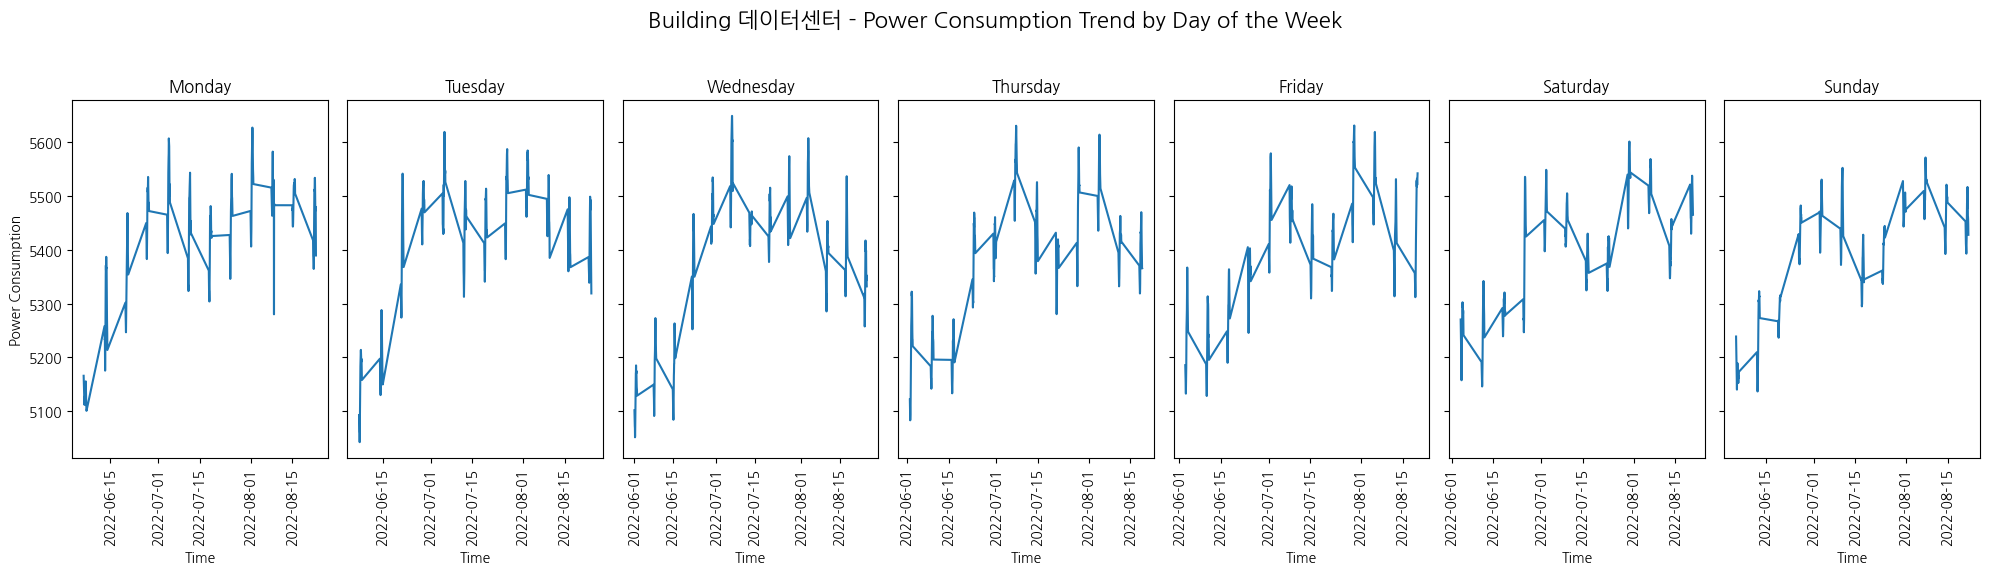

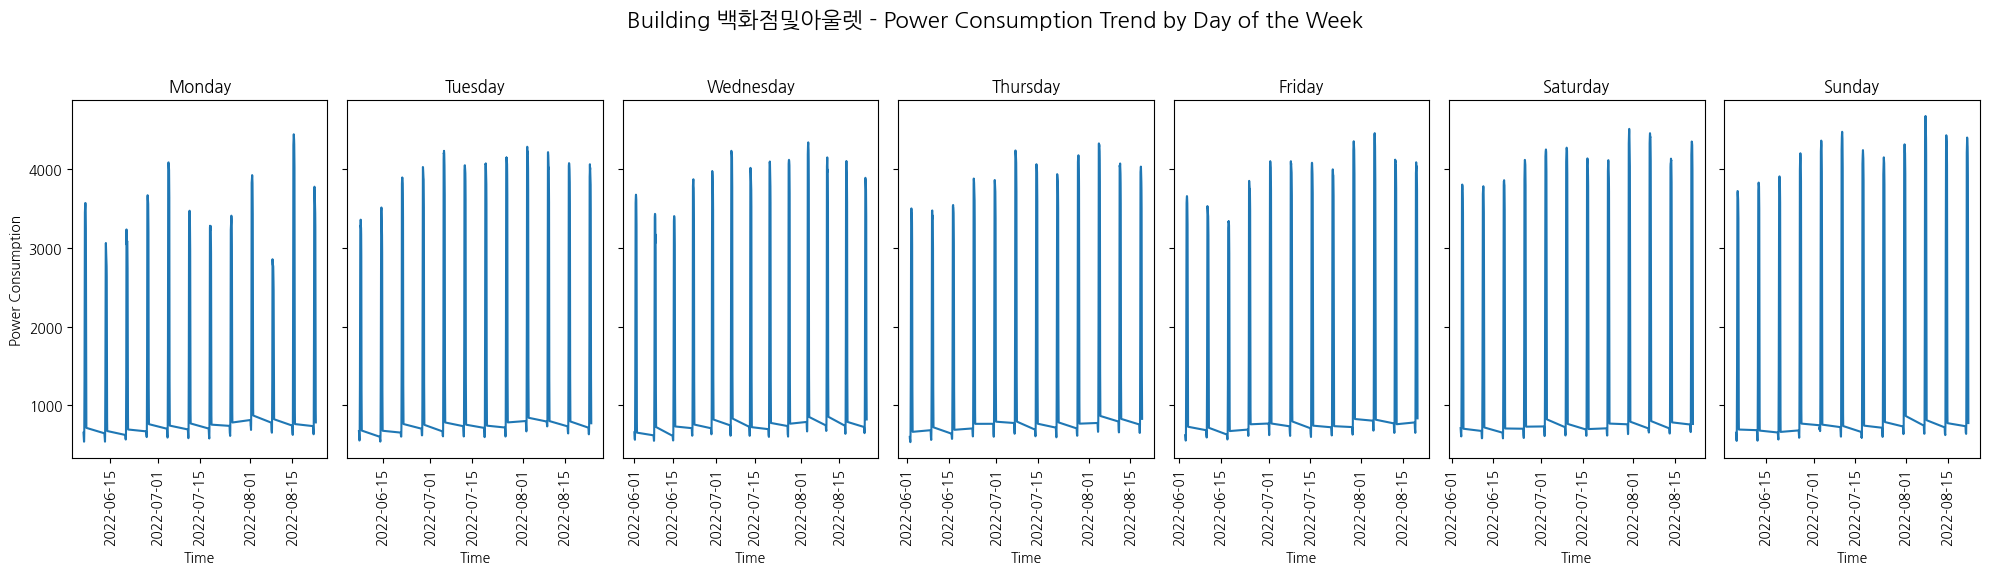

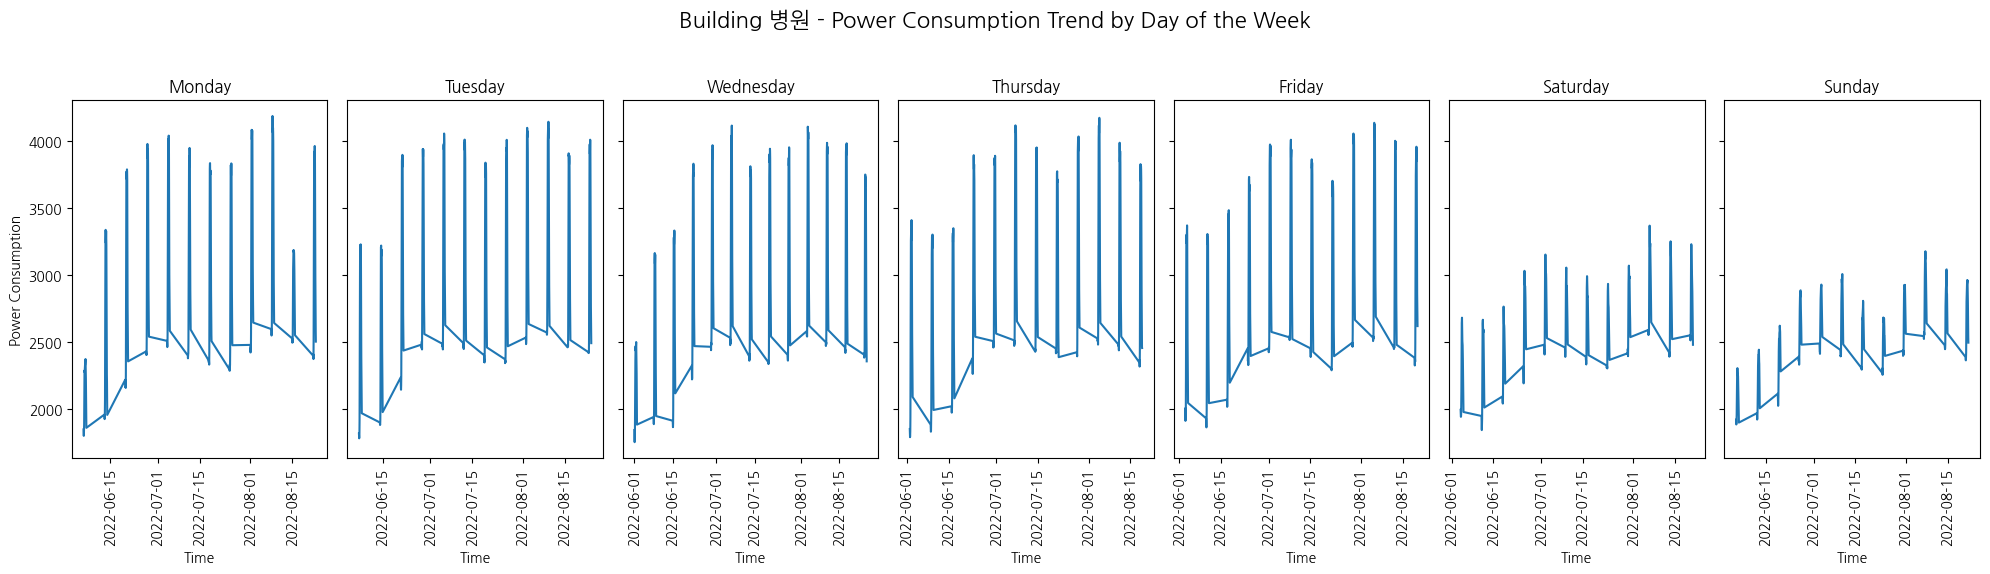

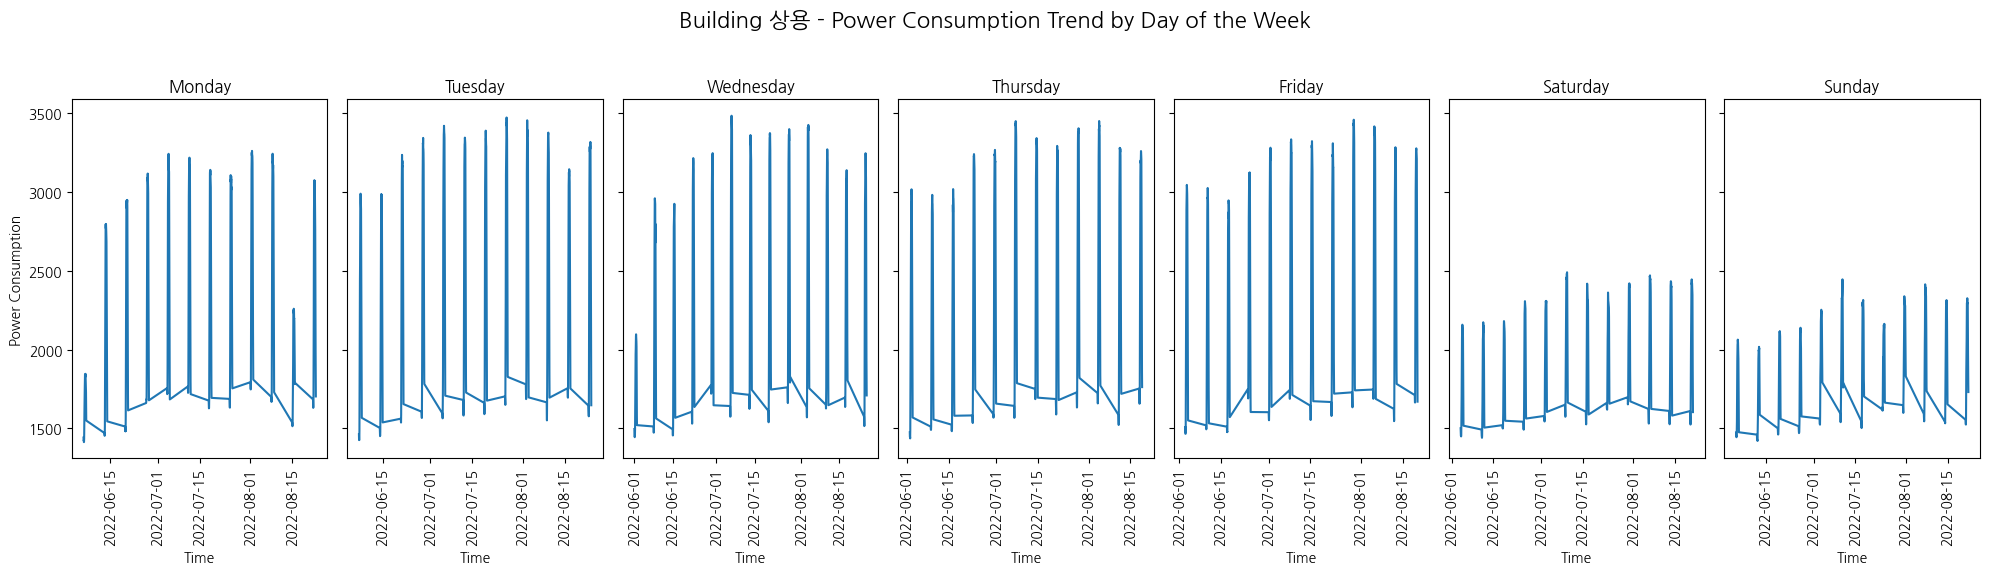

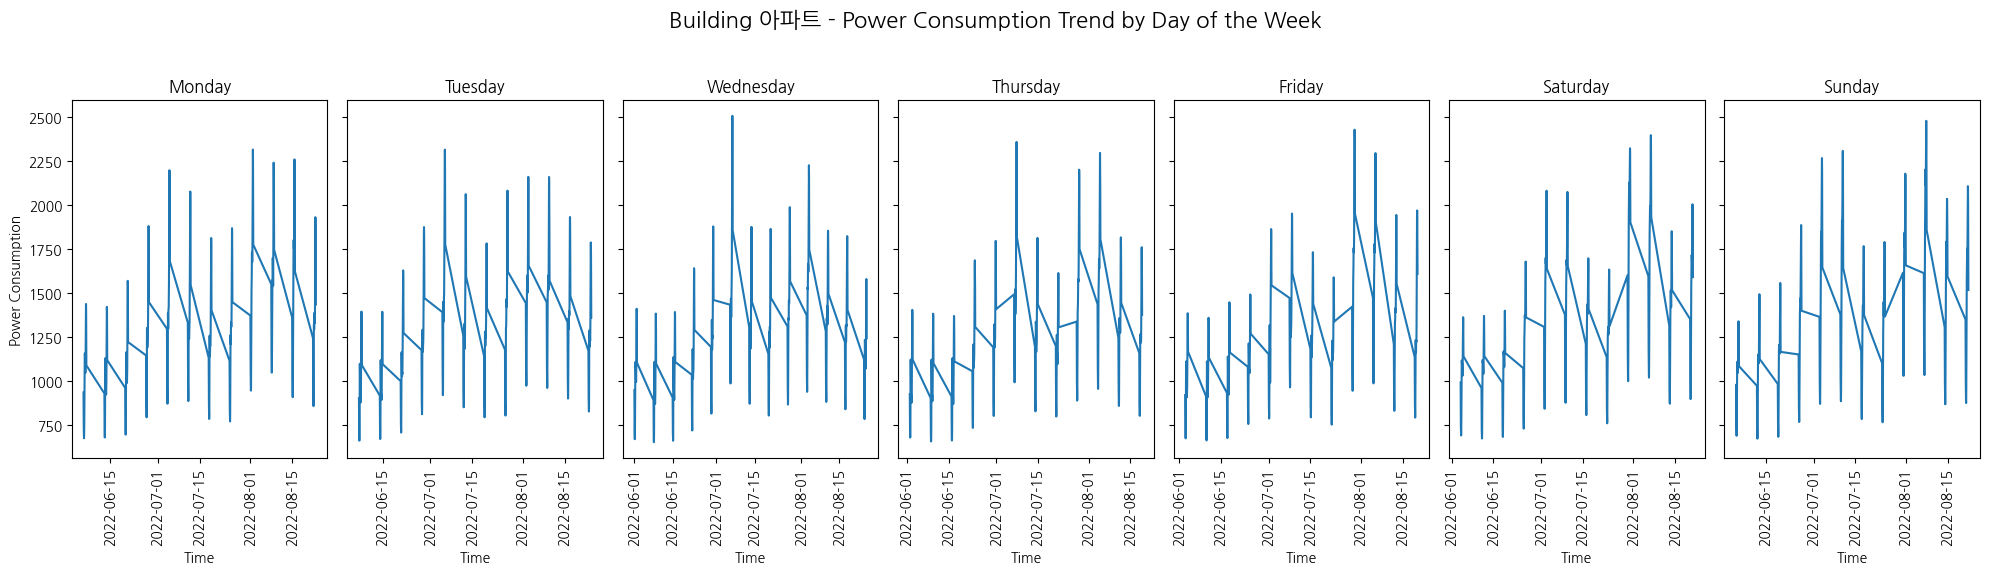

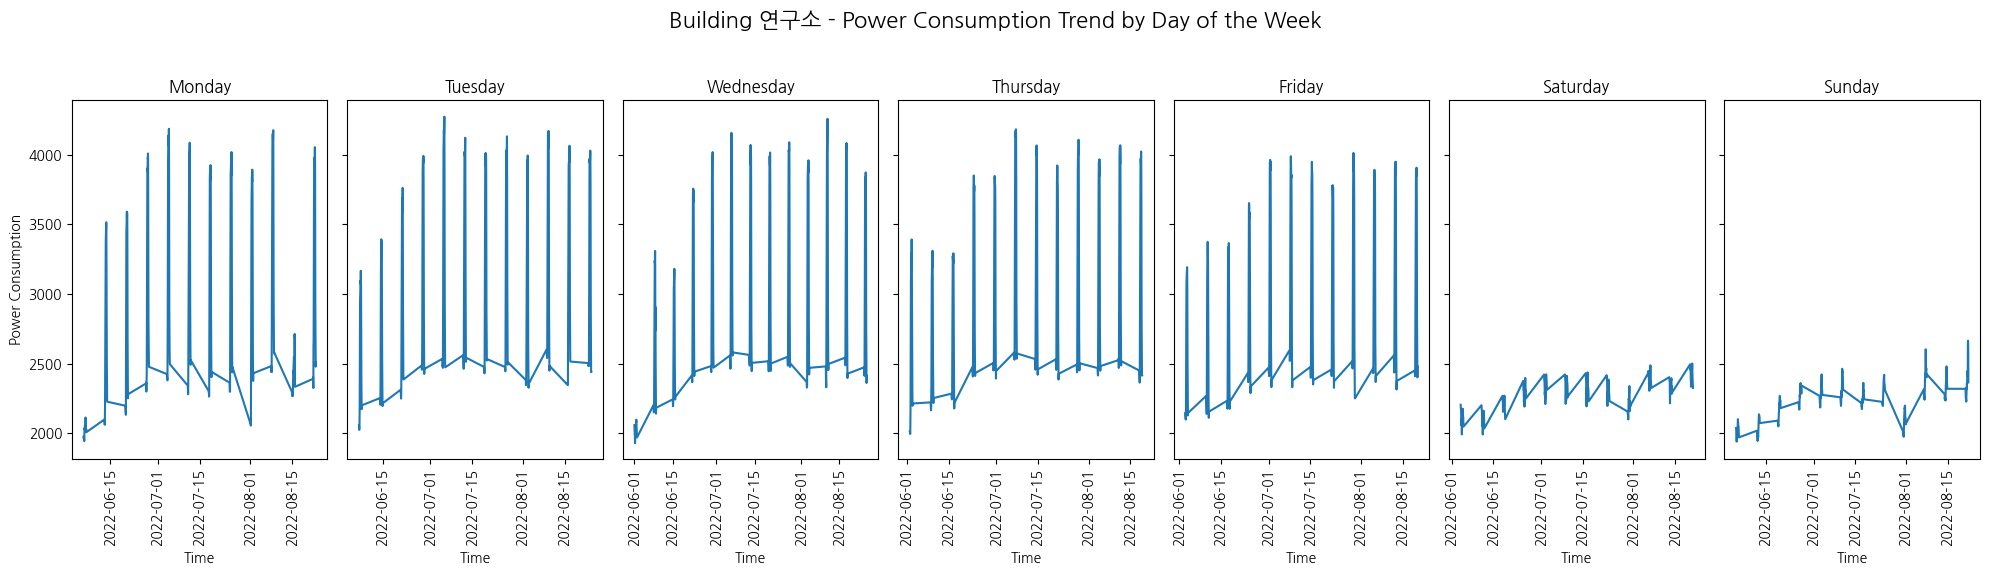

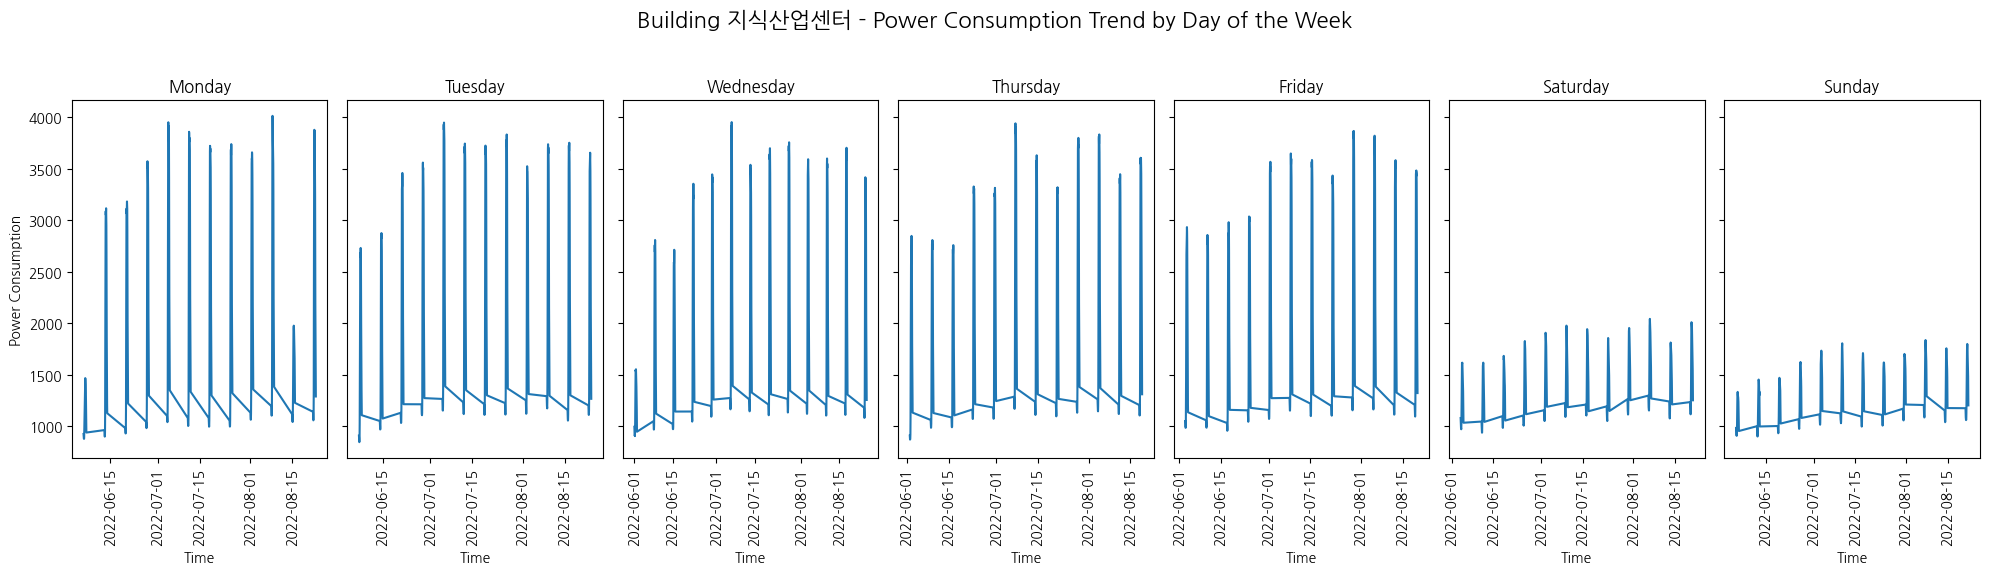

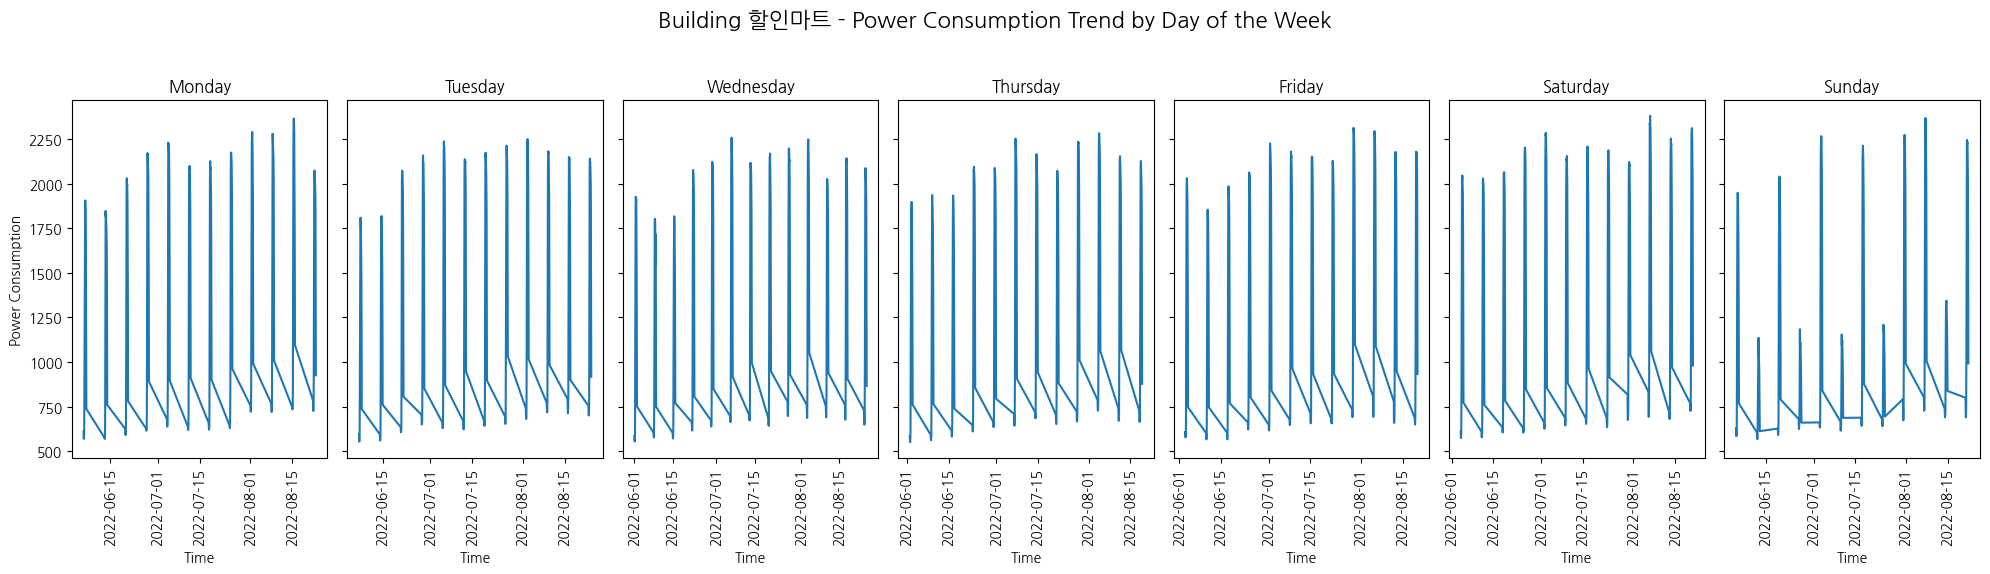

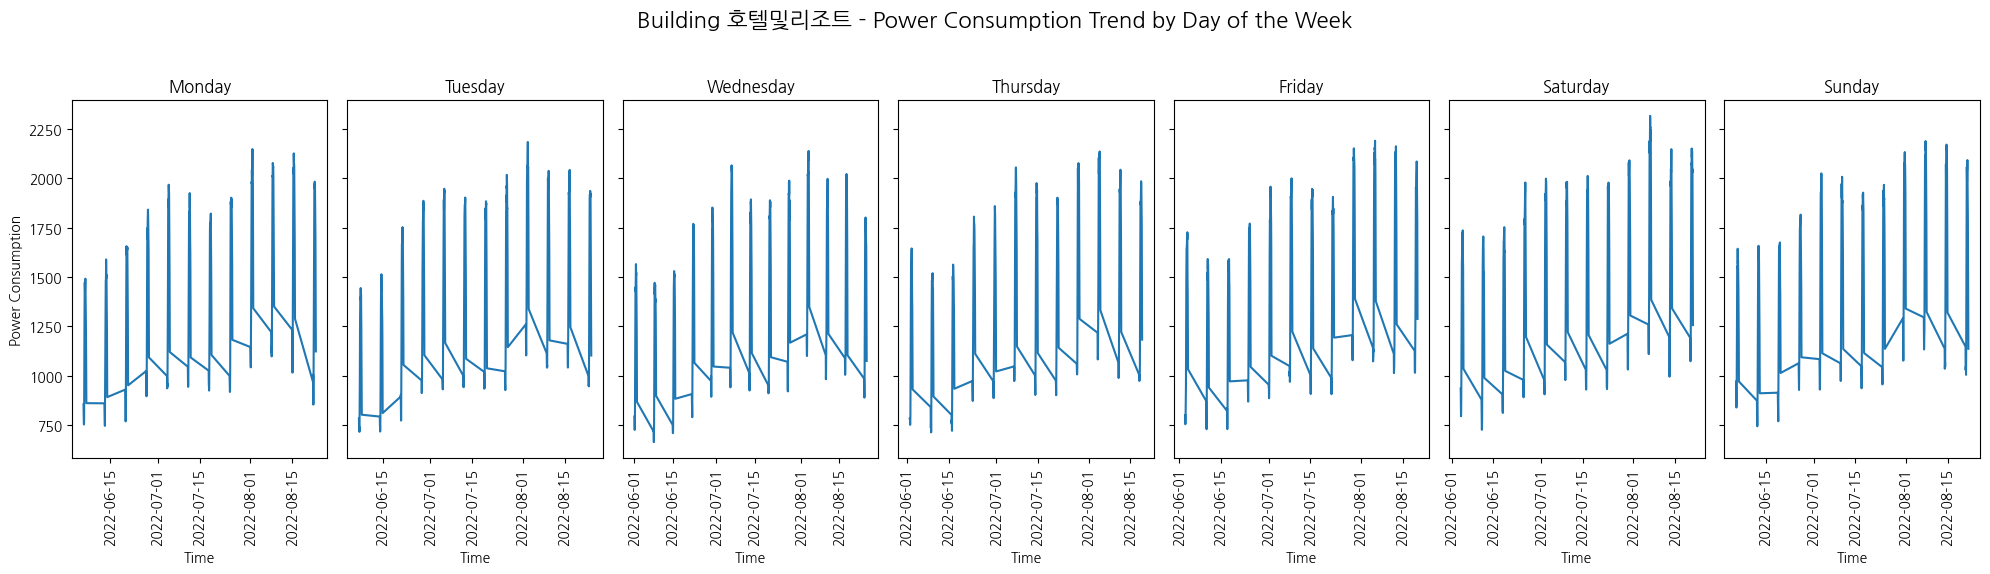

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'train'
# and it has columns 'date_time', 'building_number', and 'power_consumption'

# Convert 'date_time' to datetime object
train['datetime'] = pd.to_datetime(train['date_time'])

# Extract the day of the week and create a new column
train['weekday'] = train['datetime'].dt.dayofweek

# Choose a specific building number for visualization
selected_building_type = 1
for selected_building_type in train['building_type'].unique():
  building_data = train[train['building_type'] == selected_building_type]

  # Create a 1x7 subplot grid (for each day of the week)
  fig, axes = plt.subplots(1, 7, figsize=(20, 6), sharey=True)
  fig.suptitle(f'Building {selected_building_type} - Power Consumption Trend by Day of the Week', fontsize=16)

  # Iterate over each day of the week (0 to 6)
  for day, ax in zip(range(7), axes):
      # Filter data for the specific day
      day_data = building_data[building_data['weekday'] == day]

      # Plot the lineplot on the current axis
      sns.lineplot(x='datetime', y='power_consumption', data=day_data, ax=ax, ci=None)

      # Customize the plot
      ax.set_title(day_data.iloc[0]["datetime"].strftime("%A"))
      ax.set_xlabel('Time')
      ax.set_ylabel('Power Consumption')

      # Rotate x-axis tick labels vertically
      ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

  # Adjust layout
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])

  # Show the plot
  plt.show()

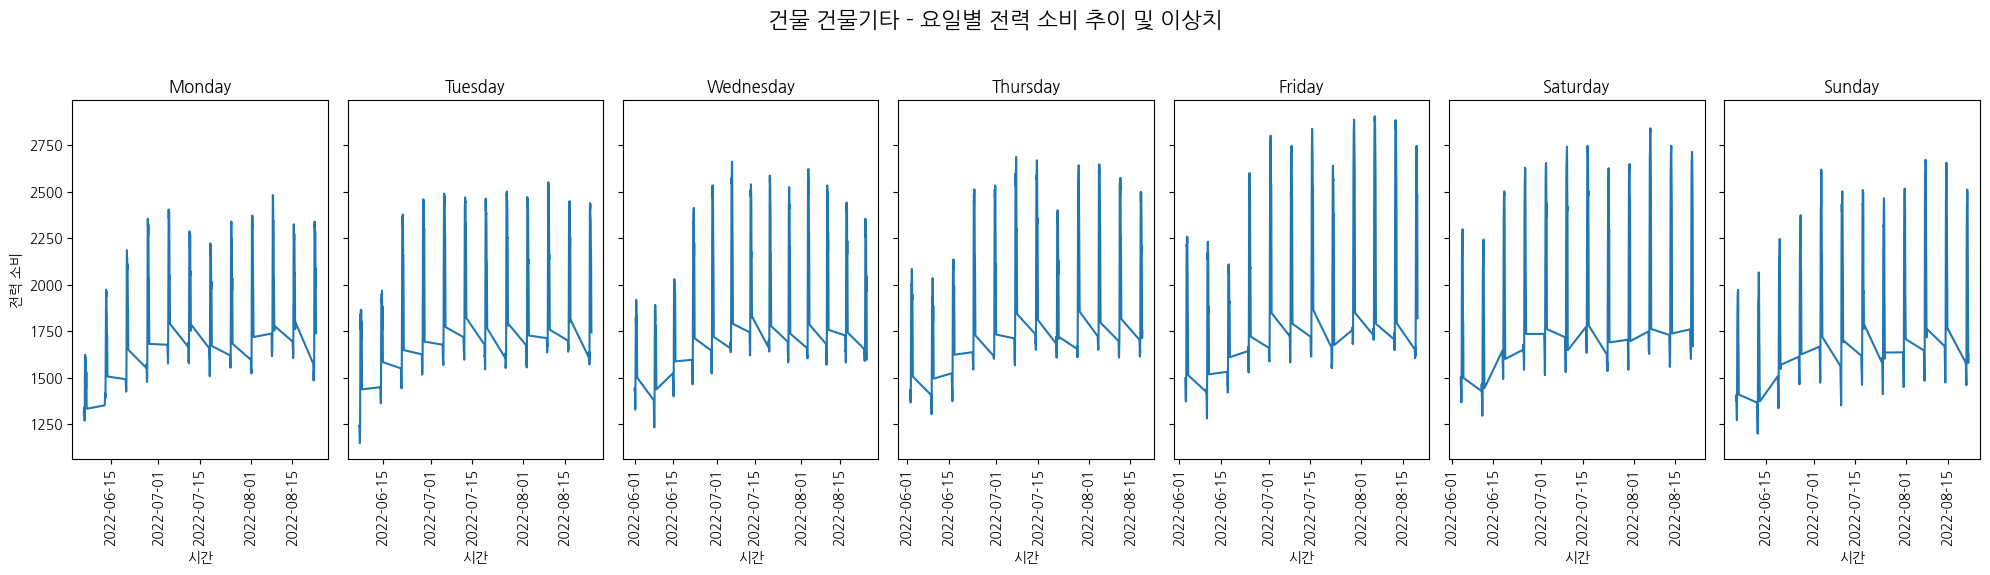

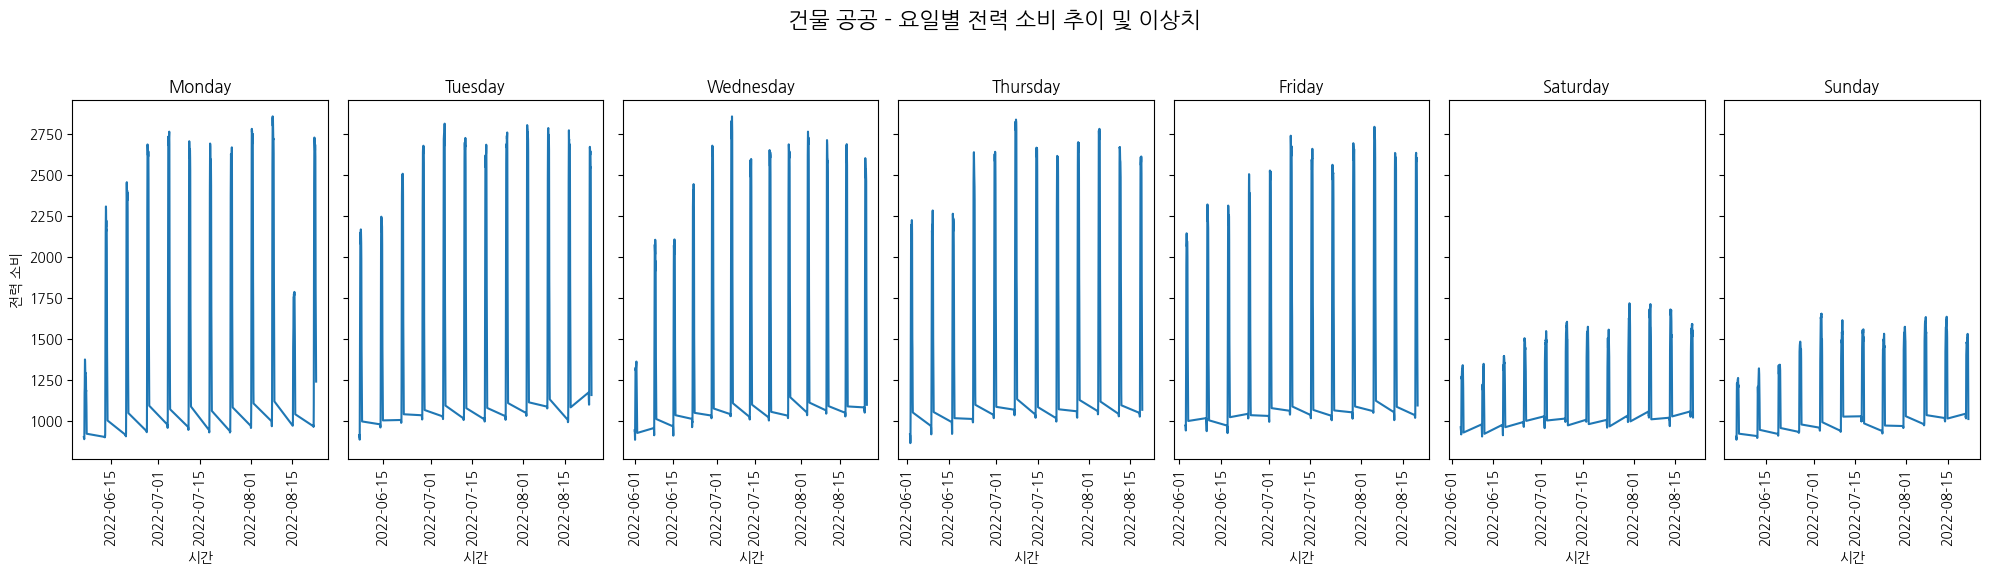

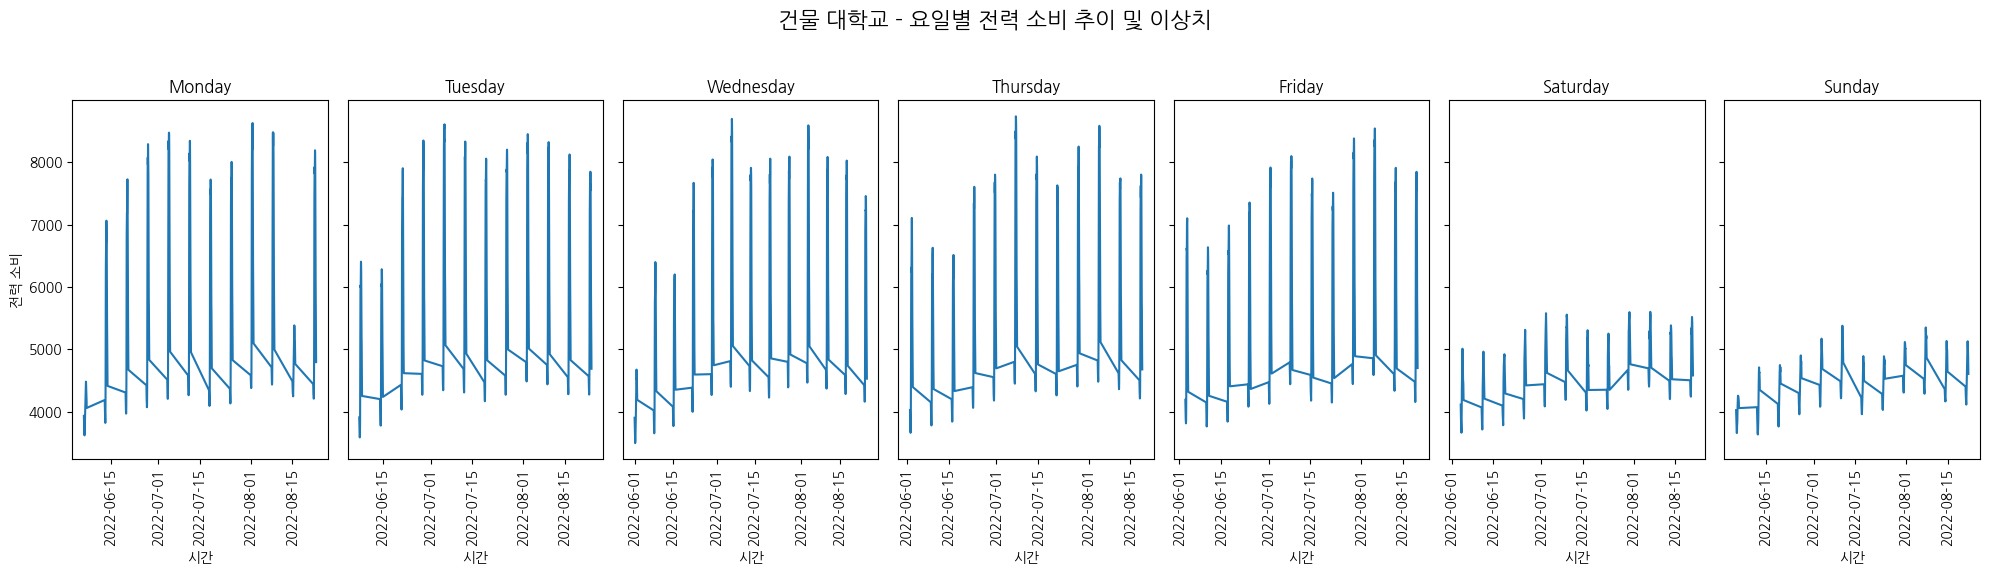

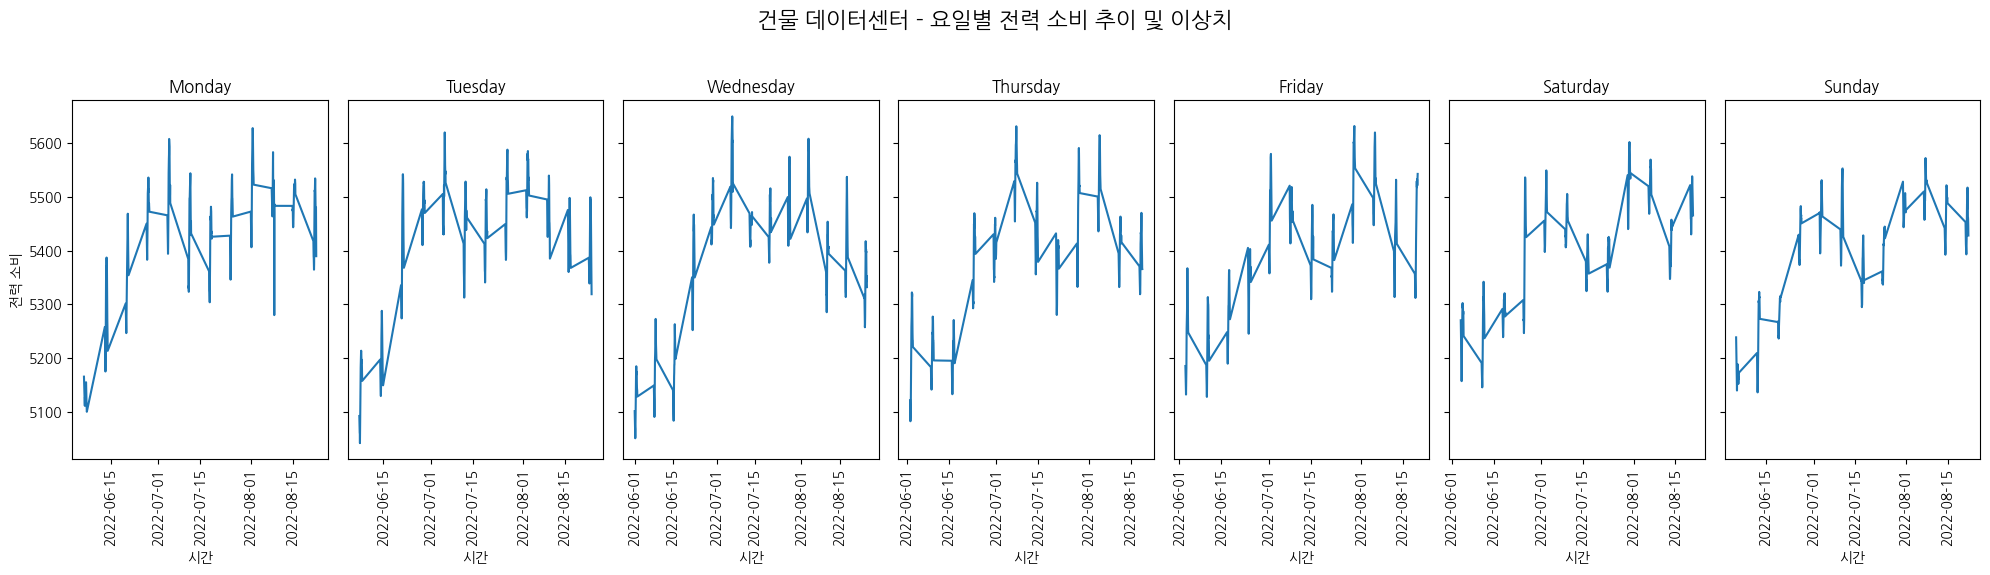

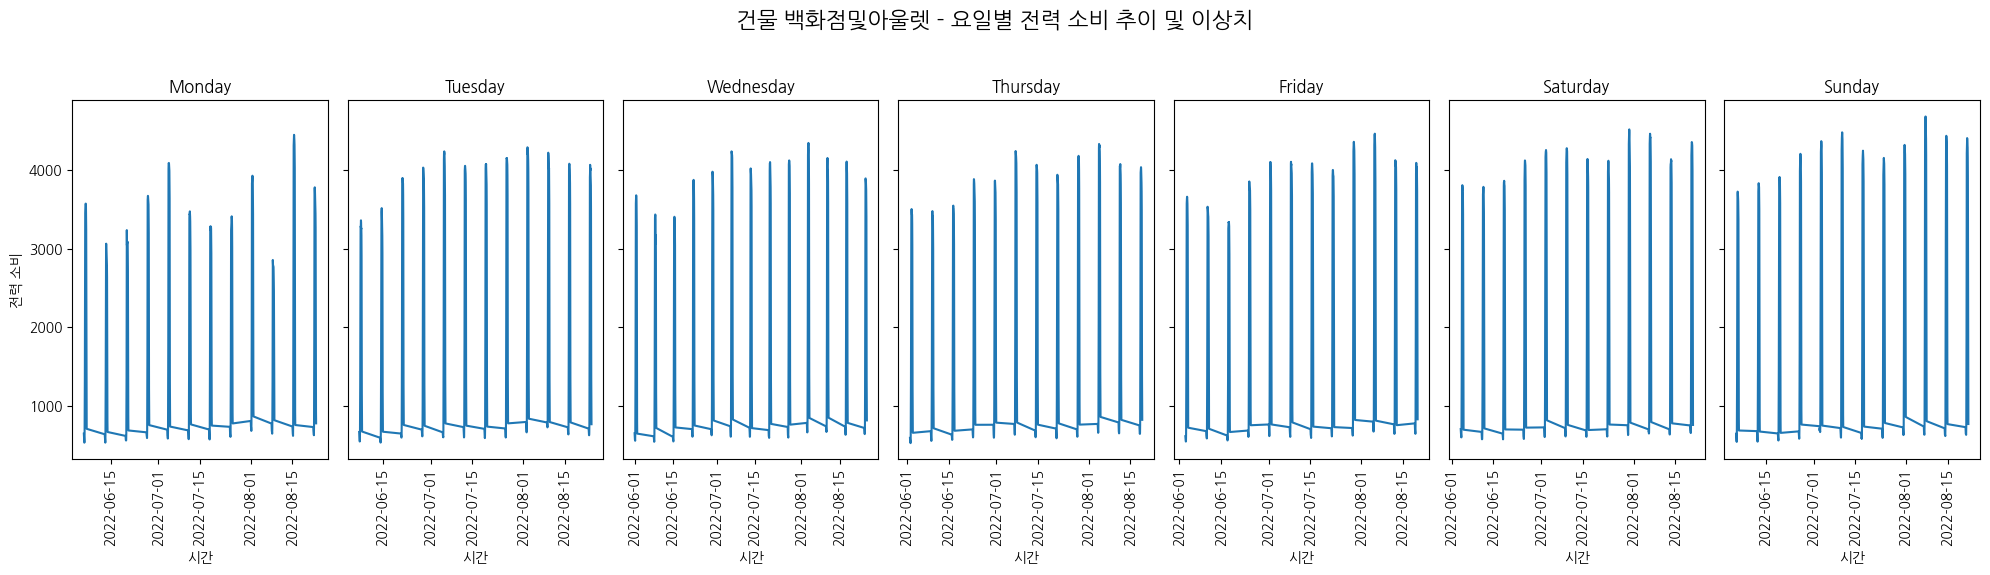

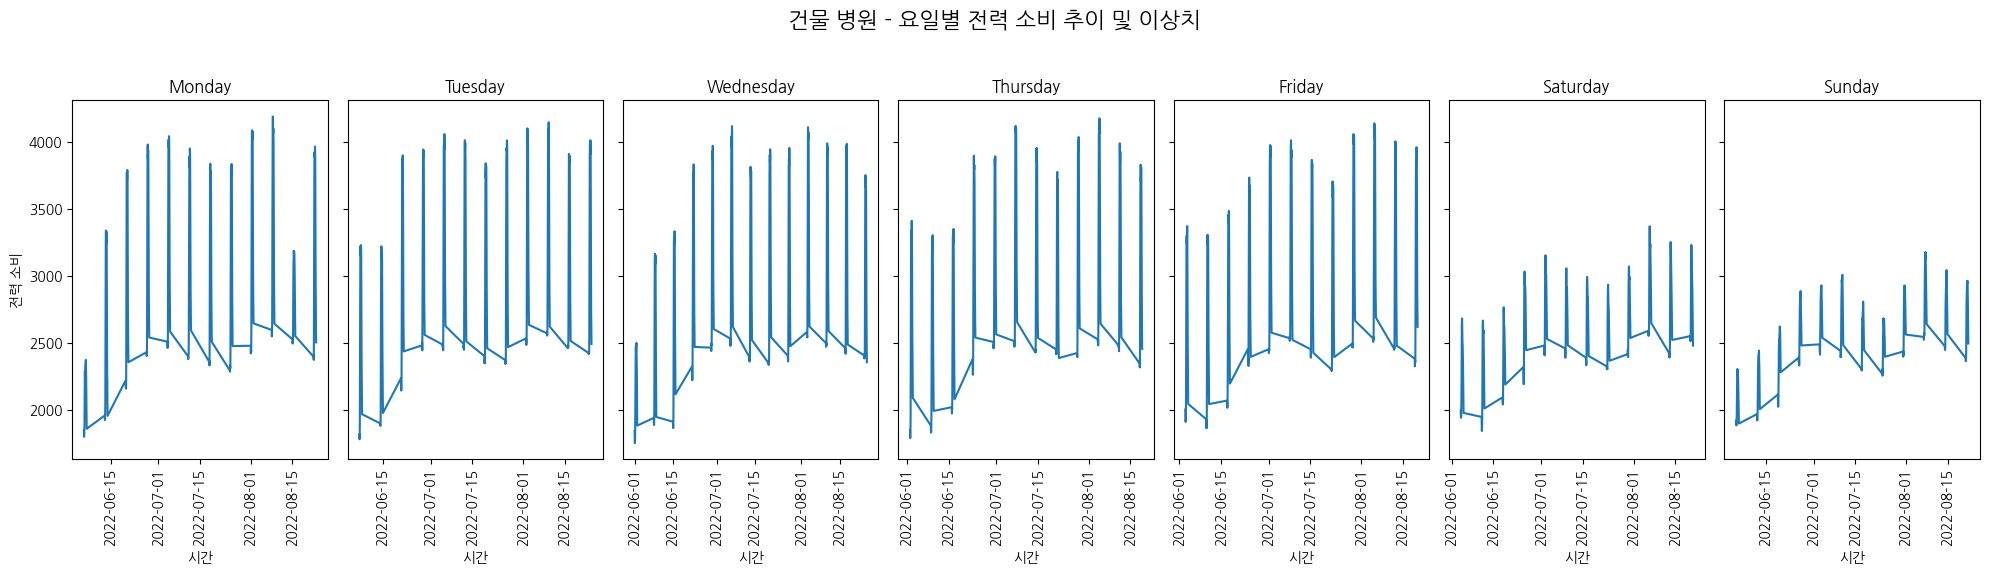

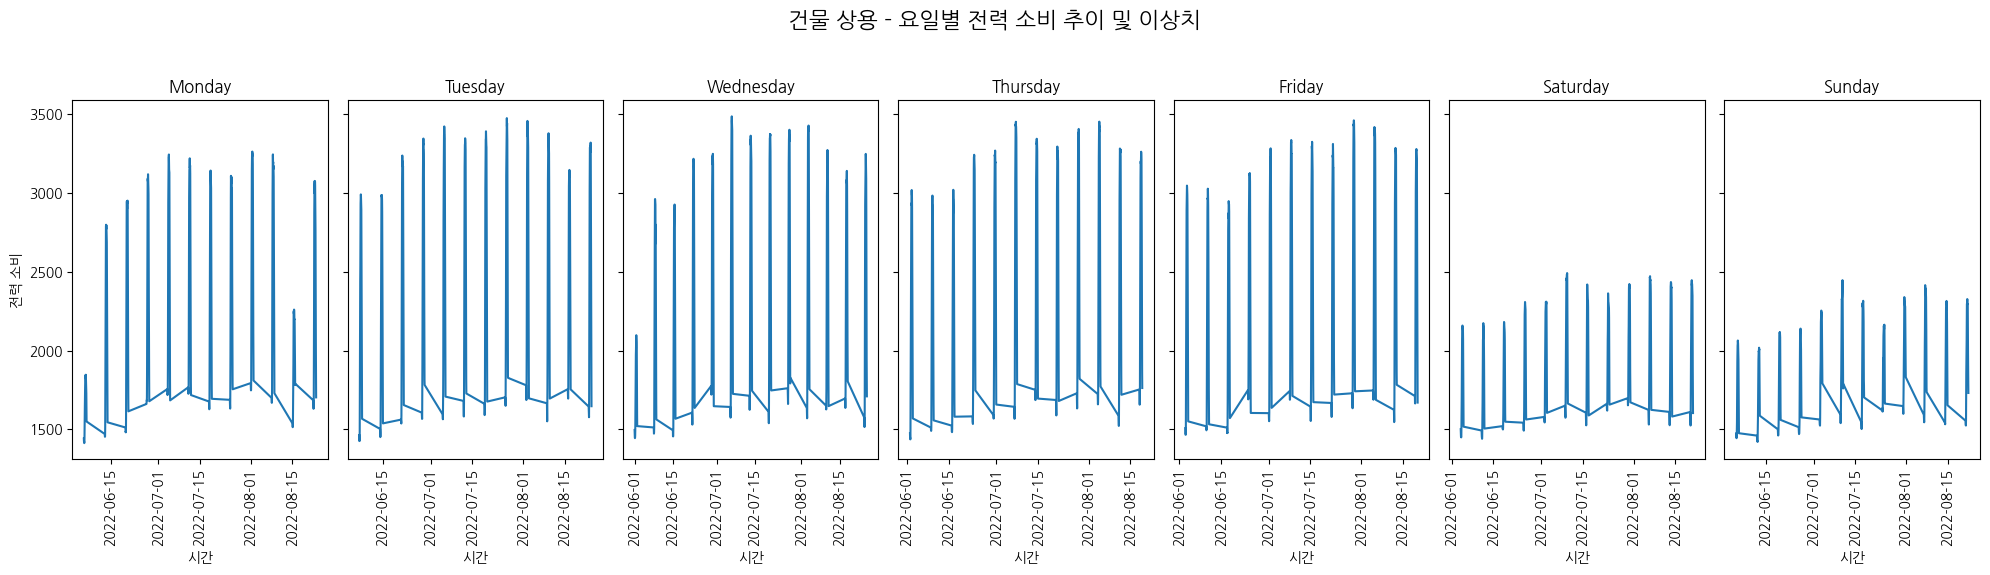

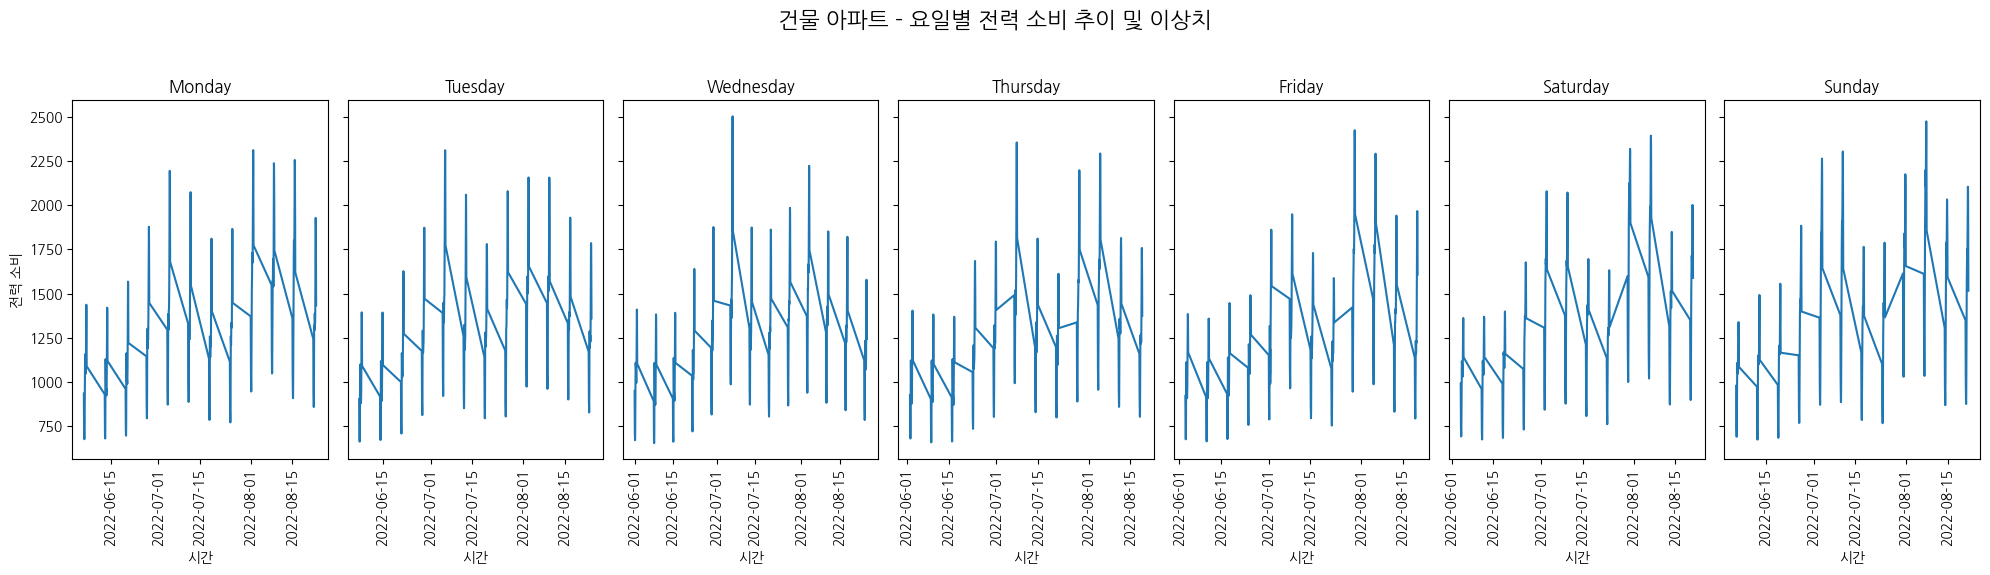

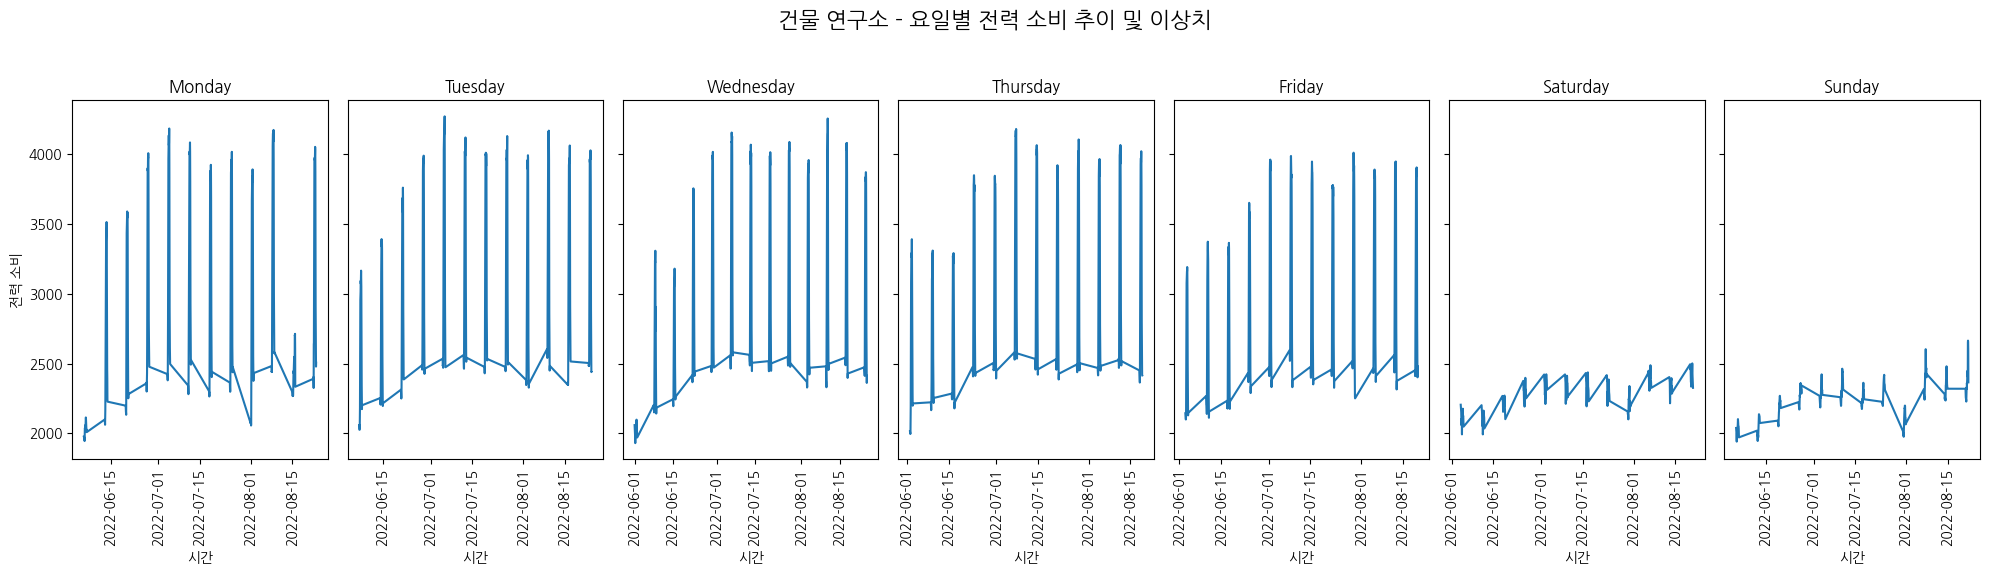

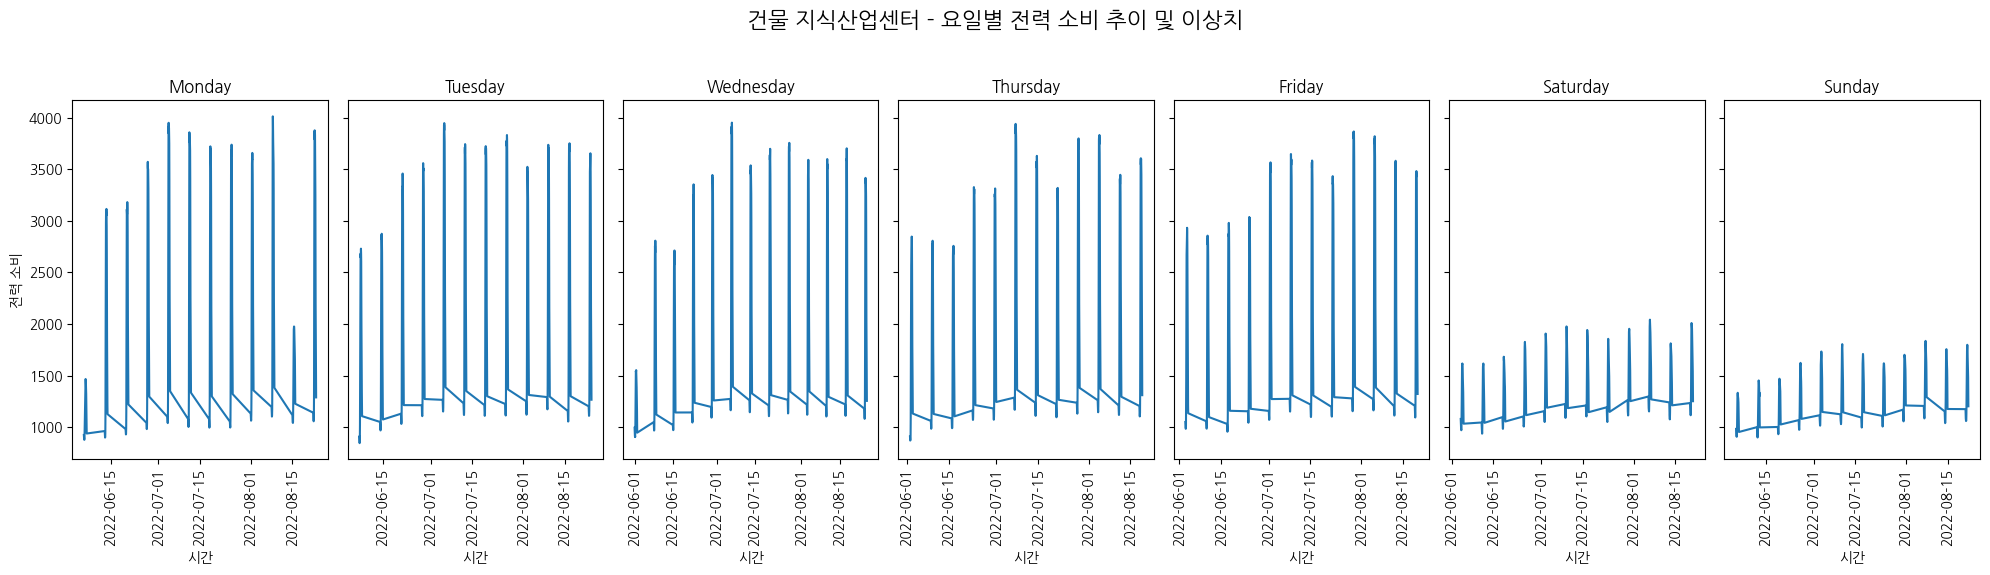

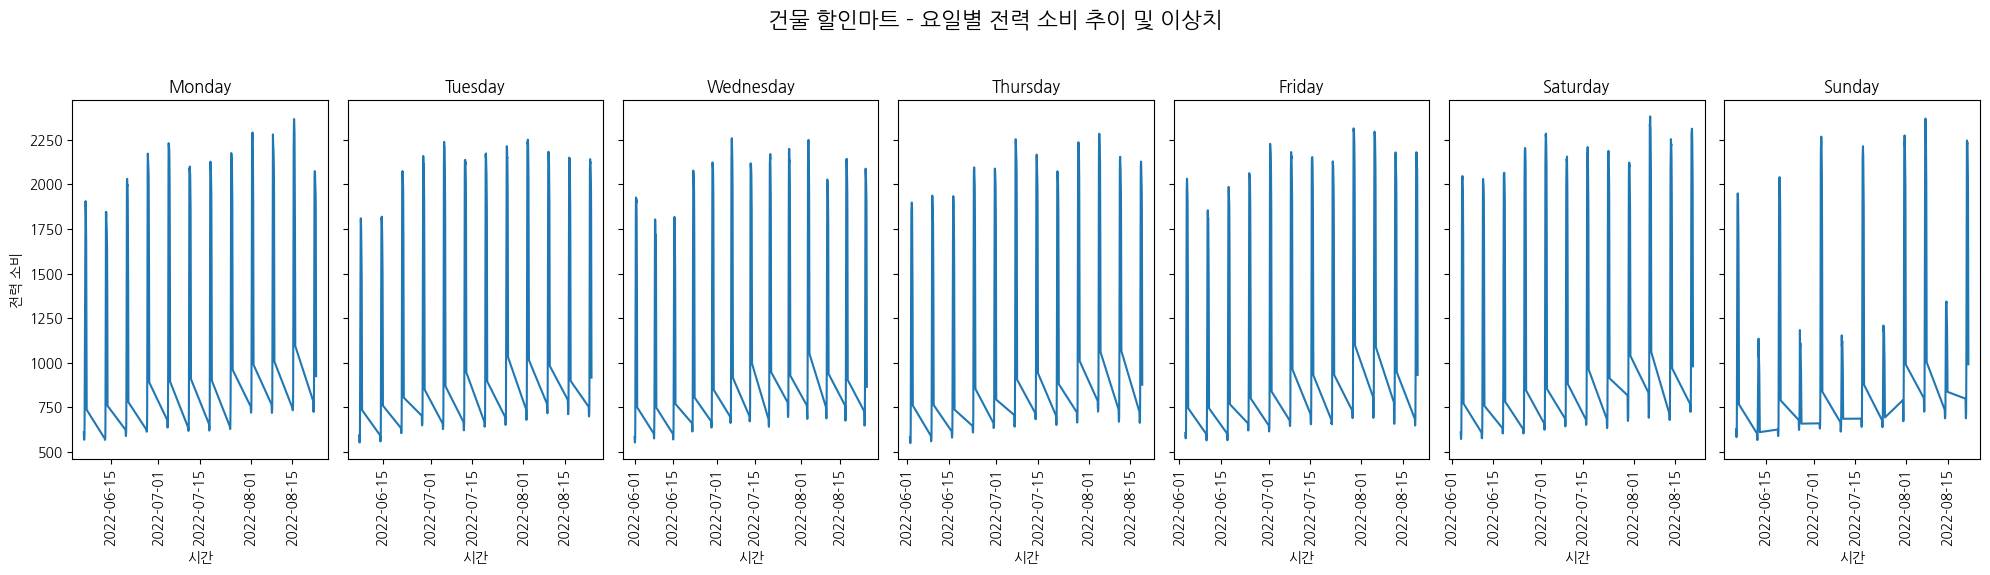

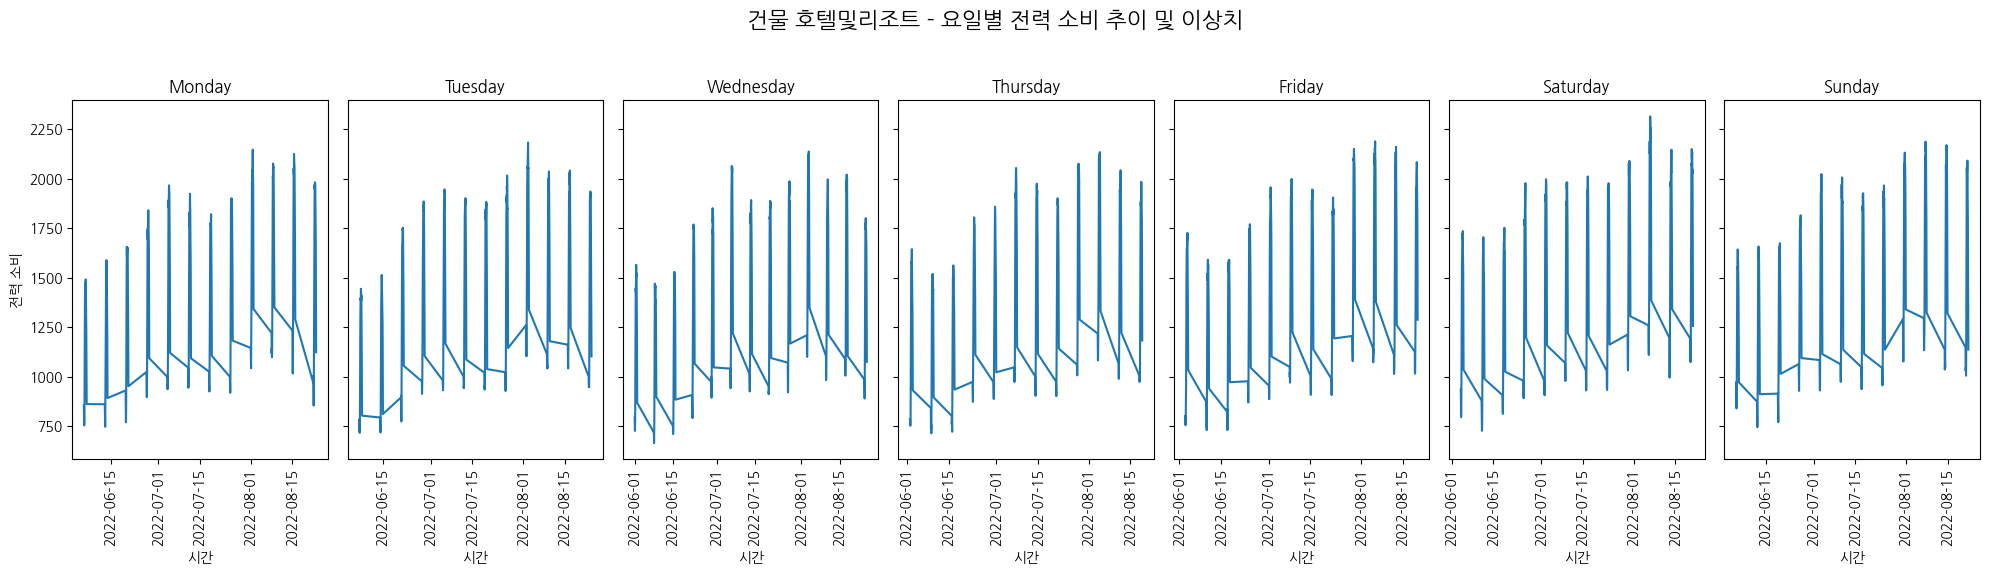

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 'train'이라는 DataFrame이 'date_time', 'building_number', 'power_consumption' 열을 가지고 있다고 가정합니다

# 'date_time'을 datetime 객체로 변환
train['datetime'] = pd.to_datetime(train['date_time'])

# 요일 추출 및 새로운 열 생성
train['weekday'] = train['datetime'].dt.dayofweek

# 각 건물 유형에 대해 반복
for selected_building_type in train['building_type'].unique():
    building_data = train[train['building_type'] == selected_building_type]

    # 1x7 서브플롯 그리드 생성 (각 요일에 대한)
    fig, axes = plt.subplots(1, 7, figsize=(20, 6), sharey=True)
    fig.suptitle(f'건물 {selected_building_type} - 요일별 전력 소비 추이 및 이상치', fontsize=16)

    # 각 요일에 대해 반복 (0에서 6까지)
    for day, ax in zip(range(7), axes):
        # 특정 요일에 대한 데이터 필터링
        day_data = building_data[building_data['weekday'] == day]

        # Z-Score 계산
        z_scores = stats.zscore(day_data['power_consumption'])
        # 이상치를 식별하기 위한 임계값 정의
        threshold = 3
        outliers = (abs(z_scores) > threshold)

        # 현재 축에 lineplot 그리기
        sns.lineplot(x='datetime', y='power_consumption', data=day_data, ax=ax, ci=None)

        # # 이상치를 빨간 점으로 표시
        # ax.plot(day_data.loc[outliers, 'datetime'], day_data.loc[outliers, 'power_consumption'], 'ro', label='이상치')

        # 그래프 커스터마이징
        ax.set_title(day_data.iloc[0]["datetime"].strftime("%A"))
        ax.set_xlabel('시간')
        ax.set_ylabel('전력 소비')

        # x축 눈금 레이블을 세로로 회전
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

    # 레이아웃 조정
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # 그래프 표시
    plt.show()

이상치

병원
* 6월 8일

In [ ]:
train['building_type'].unique()

array(['건물기타', '공공', '대학교', '데이터센터', '백화점및아울렛', '병원', '상용', '아파트', '연구소',
       '지식산업센터', '할인마트', '호텔및리조트'], dtype=object)

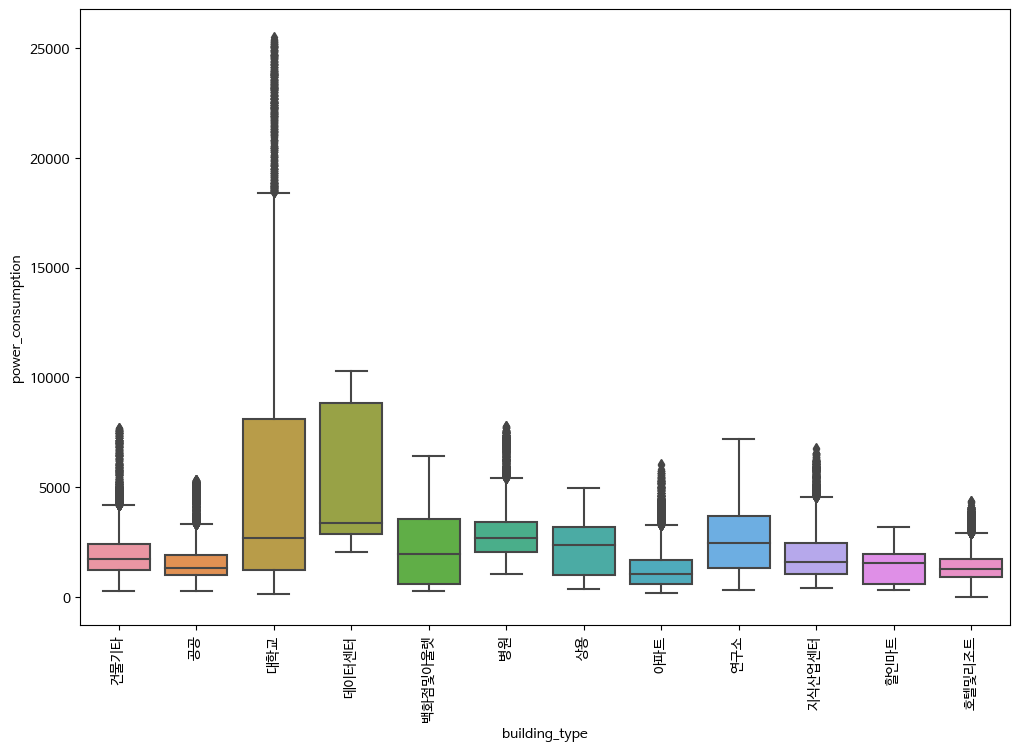

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))
sns.boxplot(x='building_type', y='power_consumption', data=train)

plt.xticks(rotation=90)
plt.show()

temperature,
rainfall,
windspeed,
humidity 에 따른 전력 소비량

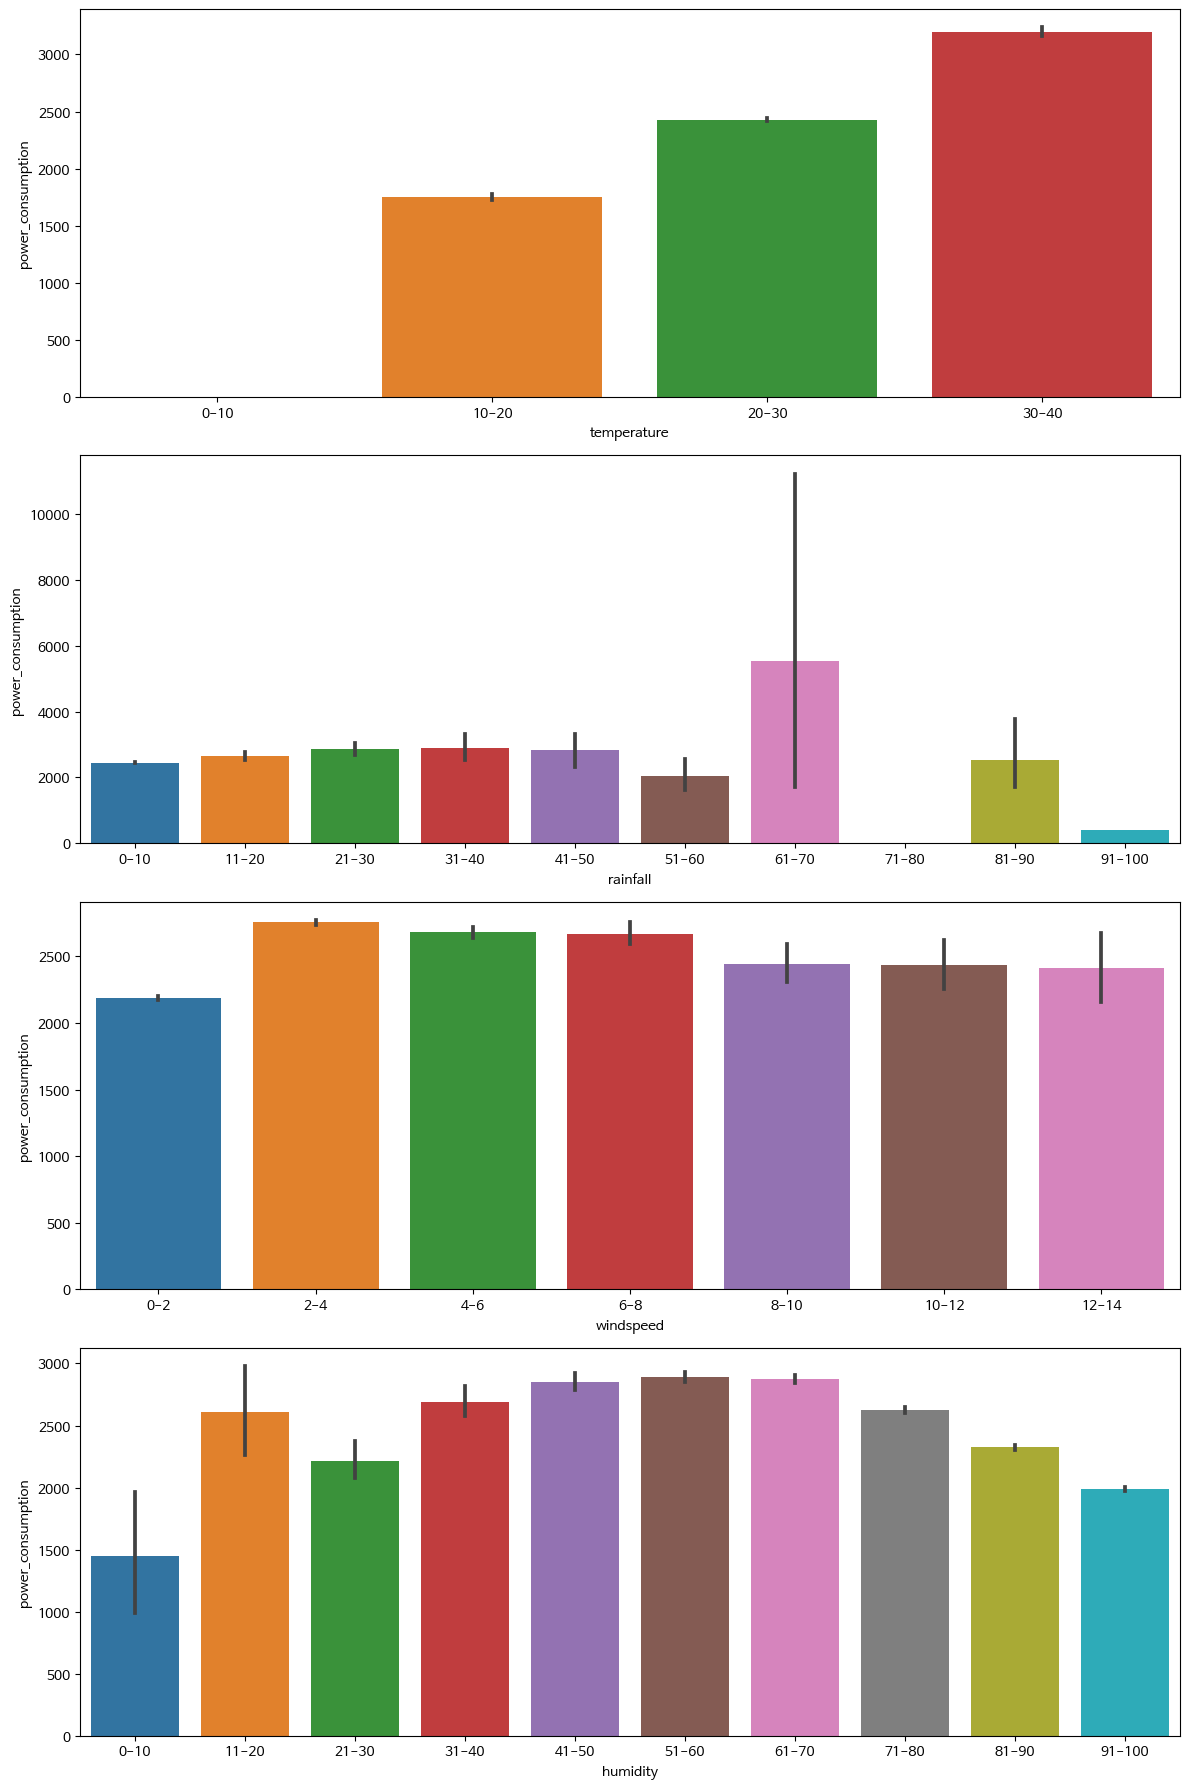

In [ ]:
temperature = pd.cut(train['temperature'],
                     bins=[0, 10, 20, 30, 40],
                     labels=['0-10', '10-20', '20-30', '30-40'],
                     include_lowest=True)

rainfall = pd.cut(train['rainfall'],
                  bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  labels=['0-10', '11-20', '21-30', '31-40',
                          '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'],
                  include_lowest=True)

windspeed = pd.cut(train['windspeed'],
                   bins=[0, 2, 4, 6, 8, 10, 12, 14],
                   labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14'],
                   include_lowest=True)

humidity = pd.cut(train['humidity'],
                  bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  labels=['0-10', '11-20', '21-30', '31-40',
                          '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'],
                  include_lowest=True)

figure, axes = plt.subplots(nrows=4)

figure.set_size_inches(12, 18)

sns.barplot(x=temperature, y='power_consumption', data=train, ax=axes[0])
sns.barplot(x=rainfall, y='power_consumption', data=train, ax=axes[1])
sns.barplot(x=windspeed, y='power_consumption', data=train, ax=axes[2])
sns.barplot(x=humidity, y='power_consumption', data=train, ax=axes[3])


plt.tight_layout()
plt.show()

* tamperature
  * 0~10 까지는 전력사용량이 0이다.
* rainfall
  * 61~70 구간은 신뢰도 범위가 너무 크다
  * 71~80 구간은 전령사용량이 없다.
* windspeed
  * 평균적으로 다 균등해서 데이터로써의 가치가 없는 것 같다.
* humidity
  * 균등하긴하나 약간의 차이가 존재한다.

# 2. Baseline Model

In [ ]:
all_data = pd.concat([train,test], ignore_index=True)

In [ ]:
all_data['datetime'] = pd.to_datetime(all_data['date_time'], format='%Y%m%d %H')

# date time feature 생성
all_data['hour'] = all_data['datetime'].dt.hour
all_data['day'] = all_data['datetime'].dt.day
all_data['month'] = all_data['datetime'].dt.month
all_data['year'] = all_data['datetime'].dt.year

In [ ]:
all_data['building_type'] = all_data['building_type'].map({
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
})

In [ ]:
all_data.drop(['date_time', 'datetime','solar_power_capacity','ess_capacity','pcs_capacity','year'], axis=1, inplace=True)

In [ ]:
all_data

building_number  temperature  rainfall  windspeed  humidity  sunshine  \
0                     1         18.6       0.0        0.9      42.0       0.0   
1                     1         18.0       0.0        1.1      45.0       0.0   
2                     1         17.7       0.0        1.5      45.0       0.0   
3                     1         16.7       0.0        1.4      48.0       0.0   
4                     1         18.4       0.0        2.8      43.0       0.0   
...                 ...          ...       ...        ...       ...       ...   
220795              100         22.5       0.0        0.9      84.0       NaN   
220796              100         20.7       0.0        0.4      95.0       NaN   
220797              100         20.2       0.0        0.4      98.0       NaN   
220798              100         20.1       0.0        1.1      97.0       NaN   
220799              100         19.1       0.0        0.1      99.0       NaN   

        solar_radiation  power_consumption  time  weekday  ...  \
0                   0.0            1085.28     0        2  ...   
1                   0.0            1047.36     1        2  ...   
2                   0.0             974.88     2        2  ...   
3                   0.0             953.76     3        2  ...   
4                   0.0             986.40     4        2  ...   
...                 ...                ...   ...      ...  ...   
220795              NaN                NaN    19        2  ...   
220796              NaN                NaN    20        2  ...   
220797              NaN                NaN    21        2  ...   
220798              NaN                NaN    22        2  ...   
220799              NaN                NaN    23        2  ...   

        building_type_Data Center  building_type_Department Store and Outlet  \
0                               0                                          0   
1                               0                                          0   
2                               0                                          0   
3                               0                                          0   
4                               0                                          0   
...                           ...                                        ...   
220795                          0                                          0   
220796                          0                                          0   
220797                          0                                          0   
220798                          0                                          0   
220799                          0                                          0   

        building_type_Discount Mart  building_type_Hospital  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
220795                            0                       0   
220796                            0                       0   
220797                            0                       0   
220798                            0                       0   
220799                            0                       0   

        building_type_Hotel and Resort  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
...                                ...   
220795                               1   
220796                               1   
220797                               1   
220798                               1   
220799                               1   

        building_ty

In [ ]:
all_data = pd.get_dummies(all_data, columns=['building_type'], drop_first=True)

KeyError: ignored

In [ ]:
X_train = all_data[all_data['power_consumption'].notna()].drop('power_consumption', axis=1)
X_test = all_data[all_data['power_consumption'].isna()].drop('power_consumption', axis=1).fillna(0)

In [ ]:
y = all_data[all_data['power_consumption'].notna()]['power_consumption']

In [ ]:
X_train, X_test, y

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=100)
model.fit(X_train, y)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
all_data.reset_index(drop=True, inplace=True)

In [ ]:
all_data = all_data.fillna(0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

def smape(actual, forecast):
    denominator = np.abs(actual) + np.abs(forecast)
    diff = np.abs(actual - forecast) / denominator
    diff[denominator == 0] = 0.0  # Handle case where both actual and forecast are zero
    return 200 * np.mean(diff)

# Assuming you have already defined X and y

# KFold to perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

smape_scores = []  # Store SMAPE scores for each fold

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model definition
    model = RandomForestRegressor(random_state=100)

    # Model training
    model.fit(X_train, y_train)

    # Model prediction
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate SMAPE for train and test sets
    train_smape = smape(y_train, train_pred)
    test_smape = smape(y_test, test_pred)

    # Store SMAPE scores
    smape_scores.append((train_smape, test_smape))

# Display SMAPE scores for each fold
for i, (train_smape, test_smape) in enumerate(smape_scores, start=1):
    print(f"Fold {i} Train SMAPE: {train_smape:.2f}, Test SMAPE: {test_smape:.2f}")

# Calculate and display mean SMAPE across all folds
mean_train_smape, mean_test_smape = np.mean(smape_scores, axis=0)
print(f"\nMean Train SMAPE: {mean_train_smape:.2f}, Mean Test SMAPE: {mean_test_smape:.2f}")


Fold 1 Train SMAPE: 1.57, Test SMAPE: 4.05
Fold 2 Train SMAPE: 1.55, Test SMAPE: 4.07
Fold 3 Train SMAPE: 1.57, Test SMAPE: 3.97
Fold 4 Train SMAPE: 1.56, Test SMAPE: 3.98
Fold 5 Train SMAPE: 1.55, Test SMAPE: 4.00

Mean Train SMAPE: 1.56, Mean Test SMAPE: 4.01


In [ ]:
# submission['answer'] = pred
# submission

# 성능 항샹(XGBoost)

In [ ]:
#pip install sktime

In [9]:
import numpy as np
import random
import os
import sys

import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.metrics import make_scorer

import lightgbm
# import pycaret
import datetime
#from sktime.forecasting.model_selection import temporal_train_test_split
from tqdm import tqdm
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
root1 ="/content/drive/MyDrive/Colab Notebooks/github_repo/PowerPrediction/open/" # in my drive
root2 ="energy/" # in github repox

train=pd.read_csv(root1+'train.csv', encoding='utf-8')
test=pd.read_csv(root1+'test.csv', encoding='utf-8')
building_info=pd.read_csv(root1+'building_info.csv', encoding='utf-8')
submission=pd.read_csv(root1+'sample_submission.csv', encoding='utf-8')

In [12]:
train = train.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train.drop('num_date_time', axis = 1, inplace=True)

test = test.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test.drop('num_date_time', axis = 1, inplace=True)

building_info = building_info.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})

피처 엔지니어링

In [13]:
# 1. train이랑 building_info랑 building_number를 기준으로 pd.merge
merged_data = pd.merge(train, building_info, on='building_number')

#피처 엔지니어링
#분석을 위한 '-'를 숫자화 (0) 한 뒤 해당 컬럼 값들을 모두 float변경
merged_data['solar_power_capacity'] = merged_data['solar_power_capacity'].replace('-', '0')
merged_data['ess_capacity'] = merged_data['ess_capacity'].replace('-', '0')
merged_data['pcs_capacity'] = merged_data['pcs_capacity'].replace('-', '0')

# train[['solar_power_capacity','ess_capacity','pcs_capacity']]= train[['solar_power_capacity','ess_capacity','pcs_capacity']].astype('float32')

#NaN값 모두 0으로 대체
train.fillna(0, inplace=True)
#필요없는 피처 제거
merged_data.drop(['solar_power_capacity','ess_capacity','pcs_capacity'],axis=1, inplace=True)


# 2. datetime을 hour, day, month, year, weekday로 나눔
merged_data['date_time'] = pd.to_datetime(merged_data['date_time'])
merged_data['hour'] = merged_data['date_time'].dt.hour
merged_data['day'] = merged_data['date_time'].dt.day
merged_data['month'] = merged_data['date_time'].dt.month
merged_data['year'] = merged_data['date_time'].dt.year
merged_data['weekday'] = merged_data['date_time'].dt.weekday

# 3. 필요없는 컬럼은 삭제
merged_data.drop('year', axis=1, inplace=True)
merged_data.drop('date_time', axis=1, inplace=True)

# 4. 6월 1일, 6월 6일, 8월 15일 일때 행을 삭제(이상치)
merged_data = merged_data[~((merged_data['month'] == 6) & ((merged_data['day'] == 1) | (merged_data['day'] == 6)))]
merged_data = merged_data[~((merged_data['month'] == 8) & (merged_data['day'] == 15))]

# building_type을 원핫 인코딩
merged_data = pd.get_dummies(merged_data, columns=['building_type'], drop_first=True)
# 결과 확인
print(merged_data.head())

    building_number  temperature  rainfall  windspeed  humidity  sunshine  \
24                1         18.1       NaN        0.4      67.0       NaN   
25                1         17.6       NaN        0.8      69.0       NaN   
26                1         17.2       NaN        0.7      71.0       NaN   
27                1         17.2       NaN        2.2      75.0       NaN   
28                1         17.2       NaN        2.0      81.0       NaN   

    solar_radiation  power_consumption  total_area  cooling_area  ...  \
24              NaN            1034.40    110634.0       39570.0  ...   
25              NaN             973.92    110634.0       39570.0  ...   
26              NaN             909.12    110634.0       39570.0  ...   
27              NaN             893.28    110634.0       39570.0  ...   
28              NaN             924.00    110634.0       39570.0  ...   

    building_type_대학교  building_type_데이터센터  building_type_백화점및아울렛  \
24                  0        

In [14]:
merged_data.columns

Index(['building_number', 'temperature', 'rainfall', 'windspeed', 'humidity',
       'sunshine', 'solar_radiation', 'power_consumption', 'total_area',
       'cooling_area', 'hour', 'day', 'month', 'weekday', 'building_type_공공',
       'building_type_대학교', 'building_type_데이터센터', 'building_type_백화점및아울렛',
       'building_type_병원', 'building_type_상용', 'building_type_아파트',
       'building_type_연구소', 'building_type_지식산업센터', 'building_type_할인마트',
       'building_type_호텔및리조트'],
      dtype='object')

In [15]:
test.columns

Index(['building_number', 'date_time', 'temperature', 'rainfall', 'windspeed',
       'humidity'],
      dtype='object')

In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196800 entries, 24 to 203999
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   building_number        196800 non-null  int64  
 1   temperature            196800 non-null  float64
 2   rainfall               42787 non-null   float64
 3   windspeed              196781 non-null  float64
 4   humidity               196791 non-null  float64
 5   sunshine               124265 non-null  float64
 6   solar_radiation        111984 non-null  float64
 7   power_consumption      196800 non-null  float64
 8   total_area             196800 non-null  float64
 9   cooling_area           196800 non-null  float64
 10  hour                   196800 non-null  int64  
 11  day                    196800 non-null  int64  
 12  month                  196800 non-null  int64  
 13  weekday                196800 non-null  int64  
 14  building_type_공공       196800 non-n

In [17]:
# score method 정의
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100

smape = make_scorer(SMAPE, greater_is_better = False)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# 특성과 라벨 분리
X_train = merged_data.drop(columns=['power_consumption'])
y_train = merged_data['power_consumption']

# 데이터 정규화
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(test)

# 데이터 분할 (훈련 및 검증 세트)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [5000],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
}

# XGBoost 모델 생성
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error',
                           error_score='raise')  # error_score='raise' 추가

# 그리드 서치 수행
grid_search.fit(X_train_split, y_train_split, eval_set=[(X_val_split, y_val_split)], early_stopping_rounds=10, verbose=True)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 검증 세트에서 최적 모델의 성능 평가
y_val_pred_best = grid_search.best_estimator_.predict(X_val_split)
val_smape_best = SMAPE(y_val_split, y_val_pred_best)
print("Validation SMAPE with Best Model:", val_smape_best)

# test 데이터에 대한 예측
# y_test_pred_best = grid_search.best_estimator_.predict(X_test_scaled)
# test_predictions_best = pd.DataFrame({'전력소비량(kWh)': y_test_pred_best})
# test_predictions_best.to_csv('test_predictions_best.csv', index=False)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: ignored